# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency


# Chargement des fichiers

In [2]:
# Chargement des fichiers
eval_df = pd.read_csv("data/extrait_eval.csv")
sirh_df = pd.read_csv("data/extrait_sirh.csv")
sondage_df = pd.read_csv("data/extrait_sondage.csv")

**Objectif : identifier les causes potentielles de démission dans l'ESN TechNova Partners**  
**Variable cible : a_quitte_l_entreprise (Oui/Non -> 1/0)**

# Observation des données

---------------------------------------------

Détection des types de données ainsi que des valeurs manquantes

In [3]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

Statistiques decriptives

In [160]:
eval_df.describe()

satisfaction_employee_environnement  note_evaluation_precedente  \
count                          1470.000000                 1470.000000   
mean                              2.721769                    2.729932   
std                               1.093082                    0.711561   
min                               1.000000                    1.000000   
25%                               2.000000                    2.000000   
50%                               3.000000                    3.000000   
75%                               4.000000                    3.000000   
max                               4.000000                    4.000000   

       niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
count                1470.000000                           1470.000000   
mean                    2.063946                              2.728571   
std                     1.106940                              1.102846   
min                     1.000000                              1.000000   
25%                     1.000000                              2.000000   
50%                     2.000000                              3.000000   
75%                     3.000000                              4.000000   
max                     5.000000                              4.000000   

       satisfaction_employee_equipe  \
count                   1470.000000   
mean                       2.712245   
std                        1.081209   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        4.000000   

       satisfaction_employee_equilibre_pro_perso  note_evaluation_actuelle  
count                                1470.000000               1470.000000  
mean                                    2.761224                  3.153741  
std                                     0.706476                  0.360824  
min                                     1.000000                  3.000000  
25%                                     2.000000                  3.000000  
50%                                     3.000000                  3.000000  
75%                                     3.000000                  3.000000  
max                                     4.000000                  4.000000

Nombre de valeurs/modalités distinctes par colonnes

In [161]:
eval_df.nunique()

satisfaction_employee_environnement             4
note_evaluation_precedente                      4
niveau_hierarchique_poste                       5
satisfaction_employee_nature_travail            4
satisfaction_employee_equipe                    4
satisfaction_employee_equilibre_pro_perso       4
eval_number                                  1470
note_evaluation_actuelle                        2
heure_supplementaires                           2
augementation_salaire_precedente               15
dtype: int64

---------------------------------------------

Détection des types de données ainsi que des valeurs manquantes

In [162]:
sirh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


Statistiques decriptives

In [163]:
sirh_df.describe()

id_employee          age  revenu_mensuel  \
count  1470.000000  1470.000000     1470.000000   
mean   1024.865306    36.923810     6502.931293   
std     602.024335     9.135373     4707.956783   
min       1.000000    18.000000     1009.000000   
25%     491.250000    30.000000     2911.000000   
50%    1020.500000    36.000000     4919.000000   
75%    1555.750000    43.000000     8379.000000   
max    2068.000000    60.000000    19999.000000   

       nombre_experiences_precedentes  nombre_heures_travailless  \
count                     1470.000000                     1470.0   
mean                         2.693197                       80.0   
std                          2.498009                        0.0   
min                          0.000000                       80.0   
25%                          1.000000                       80.0   
50%                          2.000000                       80.0   
75%                          4.000000                       80.0   
max                          9.000000                       80.0   

       annee_experience_totale  annees_dans_l_entreprise  \
count              1470.000000               1470.000000   
mean                 11.279592                  7.008163   
std                   7.780782                  6.126525   
min                   0.000000                  0.000000   
25%                   6.000000                  3.000000   
50%                  10.000000                  5.000000   
75%                  15.000000                  9.000000   
max                  40.000000                 40.000000   

       annees_dans_le_poste_actuel  
count                  1470.000000  
mean                      4.229252  
std                       3.623137  
min                       0.000000  
25%                       2.000000  
50%                       3.000000  
75%                       7.000000  
max                      18.000000

Nombre de valeurs/modalités distinctes par colonnes

In [164]:
sirh_df.nunique()

id_employee                       1470
age                                 43
genre                                2
revenu_mensuel                    1349
statut_marital                       3
departement                          3
poste                                9
nombre_experiences_precedentes      10
nombre_heures_travailless            1
annee_experience_totale             40
annees_dans_l_entreprise            37
annees_dans_le_poste_actuel         19
dtype: int64

---------------------------------------------

Détection des types de données ainsi que des valeurs manquantes

In [165]:
sondage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

Statistiques decriptives

In [166]:
sondage_df.describe()

nombre_participation_pee  nb_formations_suivies  \
count               1470.000000            1470.000000   
mean                   0.793878               2.799320   
std                    0.852077               1.289271   
min                    0.000000               0.000000   
25%                    0.000000               2.000000   
50%                    1.000000               3.000000   
75%                    1.000000               3.000000   
max                    3.000000               6.000000   

       nombre_employee_sous_responsabilite  code_sondage  \
count                               1470.0   1470.000000   
mean                                   1.0   1024.865306   
std                                    0.0    602.024335   
min                                    1.0      1.000000   
25%                                    1.0    491.250000   
50%                                    1.0   1020.500000   
75%                                    1.0   1555.750000   
max                                    1.0   2068.000000   

       distance_domicile_travail  niveau_education  \
count                1470.000000       1470.000000   
mean                    9.192517          2.912925   
std                     8.106864          1.024165   
min                     1.000000          1.000000   
25%                     2.000000          2.000000   
50%                     7.000000          3.000000   
75%                    14.000000          4.000000   
max                    29.000000          5.000000   

       annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  
count                          1470.000000                    1470.000000  
mean                              2.187755                       4.123129  
std                               3.222430                       3.568136  
min                               0.000000                       0.000000  
25%                               0.000000                       2.000000  
50%                               1.000000                       3.000000  
75%                               3.000000                       7.000000  
max                              15.000000                      17.000000

Nombre de valeurs/modalités distinctes par colonnes

In [167]:
sondage_df.nunique()

a_quitte_l_entreprise                     2
nombre_participation_pee                  4
nb_formations_suivies                     7
nombre_employee_sous_responsabilite       1
code_sondage                           1470
distance_domicile_travail                29
niveau_education                          5
domaine_etude                             6
ayant_enfants                             1
frequence_deplacement                     3
annees_depuis_la_derniere_promotion      16
annes_sous_responsable_actuel            18
dtype: int64

---------------------------------------------

#### Description des datasets : 
--------------------------------

**eval_df :** contient des informations issues de l’évaluation de collaborateurs au sein d’une organisation. Il regroupe 1 470 observations, chacune correspondant à un employé lors d’un cycle d’évaluation, et 10 variables décrivant à la fois son contexte professionnel, son niveau de satisfaction et ses performances.

* Les données couvrent plusieurs dimensions :  
    - La satisfaction de l’employé (environnement de travail, nature du travail, équipe, équilibre vie professionnelle/vie personnelle), mesurée par des scores numériques.  
    - Le niveau hiérarchique du poste occupé.  
    - Les évaluations de performance, avec une note précédente et une note actuelle.  
    - Des éléments liés à la gestion des ressources humaines, comme la présence d’heures supplémentaires et le pourcentage d’augmentation salariale accordée lors de la période précédente.  
    - Un numéro d’évaluation.  

* Ce dataset sert principalement à des analyses RH, par exemple pour :  
    - Étudier les liens entre satisfaction au travail et performance.  
    - Analyser l’évolution des évaluations des employés dans le temps.  
    - Comprendre l’impact des conditions de travail (heures supplémentaires, augmentation salariale) sur les résultats et le bien-être.  

-------------------------------------------
**sirh_df :** regroupe des données issues d’un système d’information des ressources humaines (SIRH) et décrit le profil professionnel et personnel de 1 470 employés, à travers 12 variables. Chaque ligne correspond à un collaborateur identifié de manière unique.  

* Les informations contenues couvrent plusieurs axes clés :  
    - Données sociodémographiques : âge, genre, statut marital.  
    - Informations professionnelles : département, poste occupé, nombre d’expériences professionnelles précédentes.  
    - Conditions de travail : nombre d’heures travaillées, revenu mensuel.  
    - Parcours et ancienneté : années d’expérience totale, ancienneté dans l’entreprise et durée passée dans le poste actuel.  

* Il est particulièrement utile pour :  
    - Analyser la structure des effectifs (répartition par âge, genre, poste ou département).  
    - Étudier les liens entre expérience, rémunération et ancienneté.  
-------------------------------------------
**sondage_df :** rassemble les résultats d’un sondage interne réalisé auprès des employés de l’organisation. Il contient 1 470 observations, chacune correspondant à un collaborateur, et plusieurs variables reflétant sa perception du travail, de l’environnement professionnel et de son engagement.  

* Les données portent principalement sur des dimensions qualitatives et comportementales, telles que :
    - La satisfaction globale vis-à-vis du travail et de l’entreprise.
    - Le niveau d’engagement et de motivation.
    - Les intentions de départ ou la volonté de rester dans l’entreprise.
    - La perception de la reconnaissance, des opportunités d’évolution ou du climat de travail.
    - Des éléments liés au bien-être et au ressenti général des employés.

Ce dataset a pour objectif de mesurer le ressenti des collaborateurs, complémentaire aux données plus factuelles issues du SIRH et des évaluations de performance.

* Il est particulièrement utile pour :
    - Identifier les facteurs influençant l’engagement et la satisfaction des employés.
    - Détecter des signaux faibles liés au turnover.
    - Croiser les perceptions des salariés avec leurs caractéristiques professionnelles ou leurs performances.

-----------------------------------------


Grâce à la détection du nombre de valeurs/modalités distinctes par colonnes, on peut facilement identifié les colonnes qui serviront pour la jointure dans chaque dataset. On peut aussi identifier certaines colonnes inutiles qui contiennent une seule modalités et donc n'apportent pas d'information. 

### Préparation pour réaliser la jointure

Pour la jointure : 

- eval_df : eval_number
- sirh_df : id_employee
- sondage_df : code_sondage  

Il faut que les colonnes soient de même type et identique. Il faut donc transformer la colonne eval_number en entier comme les deux autres. Pour cela on va utiliser la méthode apply() de pandas. Et il faut supprimer les "0" inutiles dans la colonne "code_sondage". 

In [168]:
print(eval_df["eval_number"])

0          E_1
1          E_2
2          E_4
3          E_5
4          E_7
         ...  
1465    E_2061
1466    E_2062
1467    E_2064
1468    E_2065
1469    E_2068
Name: eval_number, Length: 1470, dtype: object


Transformation de la colonne "eval_number" dans eval_df en int au lieu de object (suppression du "E_" devant chaque entier)

In [169]:
eval_df["eval_number"] = eval_df["eval_number"].apply(lambda x: int(x.split("_")[1]))

In [170]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   int64 
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(8), object(2)
memory usage:

In [171]:
print(eval_df["eval_number"])

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: eval_number, Length: 1470, dtype: int64


Nettoyage de la colonne code_sondage pour enlever les "0" inutiles

In [172]:
print(sondage_df["code_sondage"])

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: code_sondage, Length: 1470, dtype: int64


In [173]:
sondage_df["code_sondage"] = sondage_df["code_sondage"].apply(lambda x: str(int(x)))

In [174]:
sondage_df["code_sondage"] = sondage_df["code_sondage"].astype(int)

In [175]:
sondage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

In [176]:
print(sondage_df["code_sondage"])

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: code_sondage, Length: 1470, dtype: int64


---------------------------------------------------

# Création du dataframe central (jointure entre eval_df, sirh_df et sondage_df)

Les différents types de jointure : 

- La jointure **INNER** conserve uniquement les individus présents dans l’ensemble des tables, ce qui garantit des données complètes mais peut entraîner une perte importante d’observations si certaines informations sont manquantes.  

- La jointure **LEFT** conserve toutes les observations du jeu de données principal, même si aucune correspondance n’existe dans les autres tables. Elle est particulièrement adaptée aux analyses descriptives, statistiques ou prédictives, car elle permet de préserver l’échantillon initial tout en intégrant les informations complémentaires disponibles.  

- La jointure **RIGHT**, équivalente à une jointure LEFT en inversant l’ordre des tables, est plus rarement utilisée car elle rend l’interprétation moins intuitive.  

- La jointure **OUTER** conserve l’ensemble des observations de toutes les tables, ce qui est utile pour des objectifs d’audit ou de contrôle de qualité des données, mais génère de nombreuses valeurs manquantes, la rendant moins adaptée à une analyse statistique classique.

Le jeu de données **sondage_df** a été choisi comme jeu de données principal pour l’analyse, car il contient la variable cible ("a_quitte_l_entreprise"), élément central de l’étude. Cette variable étant indispensable à la réalisation des analyses statistiques et des modèles éventuels, il est essentiel de disposer de sa valeur pour chaque observation retenue. Par conséquent, la jointure avec les autres jeux de données a été réalisée en se basant sur sondage_df, afin de garantir que toutes les lignes du jeu de données final disposent d’une valeur renseignée pour la variable cible. Les informations issues des autres sources (données SIRH et évaluations) ont ainsi été ajoutées uniquement lorsque des correspondances existaient, ce qui peut entraîner des valeurs manquantes pour certaines variables explicatives, sans compromettre la validité de l’analyse, contrairement à l’absence de la variable cible qui rendrait toute observation inutilisable.

Jointure LEFT (on garde toutes les lignes de gauche) avec jeu de données principal sondage_df

In [ ]:
# Jointure entre le DataFrame des sondages (sondage_df) et celui des employés (sirh_df)
df_merged_left = sondage_df.merge(
    sirh_df,                        # DataFrame à joindre avec sondage_df
    how="left",                     # Jointure gauche : on garde toutes les lignes de sondage_df
    left_on="code_sondage",         # Colonne de jointure dans sondage_df
    right_on="id_employee"          # Colonne de jointure dans sirh_df
)

# Jointure du DataFrame obtenu avec le DataFrame des évaluations (eval_df)
df_merged_left = df_merged_left.merge(
    eval_df,                        # DataFrame des évaluations à joindre
    how="left",                     # Jointure gauche : on conserve toutes les lignes déjà présentes
    left_on="code_sondage",         # Colonne de jointure dans df_merged
    right_on="eval_number"          # Colonne de jointure dans eval_df
)

In [ ]:
df_merged_left.info()

In [ ]:
# Statistiques descriptives pour les variables quantitatives
df_merged_left.describe()

Jointure INNER (on garde uniquement les lignes qui ont une correspondance des deux côtés)

In [ ]:
# Jointure INNER entre le DataFrame des sondages (sondage_df) et celui des employés (sirh_df)
df_merged = sondage_df.merge(
    sirh_df,                      # DataFrame des employés à joindre
    how="inner",                  # Jointure interne : seules les lignes présentes dans les deux DataFrames sont conservées
    left_on="code_sondage",       # Colonne de jointure dans sondage_df
    right_on="id_employee"        # Colonne de jointure dans sirh_df
)

# Jointure INNER entre le DataFrame obtenu et le DataFrame des évaluations (eval_df)
df_merged = df_merged.merge(
    eval_df,                      # DataFrame des évaluations à joindre
    how="inner",                  # Jointure interne : seules les correspondances exactes sont gardées
    left_on="code_sondage",       # Colonne de jointure dans df_merged
    right_on="eval_number"        # Colonne de jointure dans eval_df
)


In [178]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   a_quitte_l_entreprise                      1470 non-null   object
 1   nombre_participation_pee                   1470 non-null   int64 
 2   nb_formations_suivies                      1470 non-null   int64 
 3   nombre_employee_sous_responsabilite        1470 non-null   int64 
 4   code_sondage                               1470 non-null   int64 
 5   distance_domicile_travail                  1470 non-null   int64 
 6   niveau_education                           1470 non-null   int64 
 7   domaine_etude                              1470 non-null   object
 8   ayant_enfants                              1470 non-null   object
 9   frequence_deplacement                      1470 non-null   object
 10  annees_depuis_la_derniere_promotion 

In [179]:
# Statistiques descriptives pour les variables quantitatives
df_merged.describe()

nombre_participation_pee  nb_formations_suivies  \
count               1470.000000            1470.000000   
mean                   0.793878               2.799320   
std                    0.852077               1.289271   
min                    0.000000               0.000000   
25%                    0.000000               2.000000   
50%                    1.000000               3.000000   
75%                    1.000000               3.000000   
max                    3.000000               6.000000   

       nombre_employee_sous_responsabilite  code_sondage  \
count                               1470.0   1470.000000   
mean                                   1.0   1024.865306   
std                                    0.0    602.024335   
min                                    1.0      1.000000   
25%                                    1.0    491.250000   
50%                                    1.0   1020.500000   
75%                                    1.0   1555.750000   
max                                    1.0   2068.000000   

       distance_domicile_travail  niveau_education  \
count                1470.000000       1470.000000   
mean                    9.192517          2.912925   
std                     8.106864          1.024165   
min                     1.000000          1.000000   
25%                     2.000000          2.000000   
50%                     7.000000          3.000000   
75%                    14.000000          4.000000   
max                    29.000000          5.000000   

       annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  \
count                          1470.000000                    1470.000000   
mean                              2.187755                       4.123129   
std                               3.222430                       3.568136   
min                               0.000000                       0.000000   
25%                               0.000000                       2.000000   
50%                               1.000000                       3.000000   
75%                               3.000000                       7.000000   
max                              15.000000                      17.000000   

       id_employee          age  ...  annees_dans_l_entreprise  \
count  1470.000000  1470.000000  ...               1470.000000   
mean   1024.865306    36.923810  ...                  7.008163   
std     602.024335     9.135373  ...                  6.126525   
min       1.000000    18.000000  ...                  0.000000   
25%     491.250000    30.000000  ...                  3.000000   
50%    1020.500000    36.000000  ...                  5.000000   
75%    1555.750000    43.000000  ...                  9.000000   
max    2068.000000    60.000000  ...                 40.000000   

       annees_dans_le_poste_actuel  satisfaction_employee_environnement  \
count                  1470.000000                          1470.000000   
mean                      4.229252                             2.721769   
std                       3.623137                             1.093082   
min                       0.000000                             1.000000   
25%                       2.000000                             2.000000   
50%                       3.000000                             3.000000   
75%                       7.000000                             4.000000   
max                      18.000000                             4.000000   

       note_evaluation_precedente  niveau_hierarchique_poste  \
count                 1470.000000                1470.000000   
mean                     2.729932                   2.063946   
std                      0.711561                   1.106940   
min                      1.000000                   1.000000   
25%                      2.000000                   1.000000   
50%                      3.000000                   2.000000   
75%                      3.000000          

-------------------------------------------

# Nettoyage du dataset 

Suppresion des variables : 
* avec une seule modalité/valeur : 
    - nombre_heures_travailless (dans sirh_df)
    - nombre_employee_sous_responsabilite (dans sondage_df)
    - ayant_enfants (dans sondage_df)
* en doublons (après la jointure)
    - code_sondage
    - eval_number

In [180]:
# Suppression des variables avec une modalité/valeur et des variables en doublons qui ont servi pour la jointure
df1 = df_merged.drop(columns=["nombre_employee_sous_responsabilite", "ayant_enfants", "eval_number", "nombre_heures_travailless", "code_sondage"])

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   a_quitte_l_entreprise                      1470 non-null   object
 1   nombre_participation_pee                   1470 non-null   int64 
 2   nb_formations_suivies                      1470 non-null   int64 
 3   distance_domicile_travail                  1470 non-null   int64 
 4   niveau_education                           1470 non-null   int64 
 5   domaine_etude                              1470 non-null   object
 6   frequence_deplacement                      1470 non-null   object
 7   annees_depuis_la_derniere_promotion        1470 non-null   int64 
 8   annes_sous_responsable_actuel              1470 non-null   int64 
 9   id_employee                                1470 non-null   int64 
 10  age                                 

In [182]:
df1["a_quitte_l_entreprise"].value_counts()

a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

Détection des variables qualitatives vs quantitatives

In [183]:
# Variables quantitatives
vars_quantitatives = df1.select_dtypes(include=["number"]).columns.tolist()

# Variables qualitatives
vars_qualitatives = df1.select_dtypes(exclude=["number"]).columns.tolist()

print("Variables quantitatives :")
print("\n".join(vars_quantitatives))

print("\nVariables qualitatives :")
print("\n".join(vars_qualitatives))

Variables quantitatives :
nombre_participation_pee
nb_formations_suivies
distance_domicile_travail
niveau_education
annees_depuis_la_derniere_promotion
annes_sous_responsable_actuel
id_employee
age
revenu_mensuel
nombre_experiences_precedentes
annee_experience_totale
annees_dans_l_entreprise
annees_dans_le_poste_actuel
satisfaction_employee_environnement
note_evaluation_precedente
niveau_hierarchique_poste
satisfaction_employee_nature_travail
satisfaction_employee_equipe
satisfaction_employee_equilibre_pro_perso
note_evaluation_actuelle

Variables qualitatives :
a_quitte_l_entreprise
domaine_etude
frequence_deplacement
genre
statut_marital
departement
poste
heure_supplementaires
augementation_salaire_precedente


Transformation des variables qualitatives suivantes en variables quantitatives (car seulement deux modalités) : 
- a_quitte_l_entreprise (Oui/Non) : 0 = Non, 1 = Oui
- Genre (F/M) : 0 = Homme, 1 = Femme
- heure_supplementaires (Oui/Non) : 0 = Non, 1 = Oui 

In [184]:
# a_quitte_l_entreprise : Non = 0, Oui = 1
df1["a_quitte_l_entreprise"] = df1["a_quitte_l_entreprise"].map({
    "Non": 0,
    "Oui": 1
})

# Genre : Homme = 0, Femme = 1
df1["genre"] = df1["genre"].map({
    "M": 0,
    "F": 1
})

# heure_supplementaires : Non = 0, Oui = 1
df1["heure_supplementaires"] = df1["heure_supplementaires"].map({
    "Non": 0,
    "Oui": 1
})

Transformation de la variable "augementation_salaire_precedente" en type int64 au lieu de object (le signe "%" est présent ce qui empêche la reconnaissance en int64) + renommage de la colonne car fautes de frappe "augementation_salaire_precedente"

In [185]:
df1 = df1.rename(columns={"augementation_salaire_precedente": "augmentation_salaire_precedente"})

In [186]:
df1["augmentation_salaire_precedente"] = df1["augmentation_salaire_precedente"].apply(lambda x: int(str(x).replace("%", "").strip()))

In [187]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   a_quitte_l_entreprise                      1470 non-null   int64 
 1   nombre_participation_pee                   1470 non-null   int64 
 2   nb_formations_suivies                      1470 non-null   int64 
 3   distance_domicile_travail                  1470 non-null   int64 
 4   niveau_education                           1470 non-null   int64 
 5   domaine_etude                              1470 non-null   object
 6   frequence_deplacement                      1470 non-null   object
 7   annees_depuis_la_derniere_promotion        1470 non-null   int64 
 8   annes_sous_responsable_actuel              1470 non-null   int64 
 9   id_employee                                1470 non-null   int64 
 10  age                                 

In [188]:
df1.describe()

a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
count            1470.000000               1470.000000            1470.000000   
mean                0.161224                  0.793878               2.799320   
std                 0.367863                  0.852077               1.289271   
min                 0.000000                  0.000000               0.000000   
25%                 0.000000                  0.000000               2.000000   
50%                 0.000000                  1.000000               3.000000   
75%                 0.000000                  1.000000               3.000000   
max                 1.000000                  3.000000               6.000000   

       distance_domicile_travail  niveau_education  \
count                1470.000000       1470.000000   
mean                    9.192517          2.912925   
std                     8.106864          1.024165   
min                     1.000000          1.000000   
25%                     2.000000          2.000000   
50%                     7.000000          3.000000   
75%                    14.000000          4.000000   
max                    29.000000          5.000000   

       annees_depuis_la_derniere_promotion  annes_sous_responsable_actuel  \
count                          1470.000000                    1470.000000   
mean                              2.187755                       4.123129   
std                               3.222430                       3.568136   
min                               0.000000                       0.000000   
25%                               0.000000                       2.000000   
50%                               1.000000                       3.000000   
75%                               3.000000                       7.000000   
max                              15.000000                      17.000000   

       id_employee          age        genre  ...  \
count  1470.000000  1470.000000  1470.000000  ...   
mean   1024.865306    36.923810     0.400000  ...   
std     602.024335     9.135373     0.490065  ...   
min       1.000000    18.000000     0.000000  ...   
25%     491.250000    30.000000     0.000000  ...   
50%    1020.500000    36.000000     0.000000  ...   
75%    1555.750000    43.000000     1.000000  ...   
max    2068.000000    60.000000     1.000000  ...   

       annees_dans_le_poste_actuel  satisfaction_employee_environnement  \
count                  1470.000000                          1470.000000   
mean                      4.229252                             2.721769   
std                       3.623137                             1.093082   
min                       0.000000                             1.000000   
25%                       2.000000                             2.000000   
50%                       3.000000                             3.000000   
75%                       7.000000                             4.000000   
max                      18.000000                             4.000000   

       note_evaluation_precedente  niveau_hierarchique_poste  \
count                 1470.000000                1470.000000   
mean                     2.729932                   2.063946   
std                      0.711561                   1.106940   
min                      1.000000                   1.000000   
25%                      2.000000                   1.000000   
50%                      3.000000                   2.000000   
75%                      3.000000                   3.000000   
max                      4.000000                   5.000000   

       satisfaction_employee_nature_travail  satisfaction_employee_equipe  \
count                           1470.000000                   1470.000000   
mean                               2.728571                      2.712245   
std                                1.102846                      1.081209   
min                                1.000000              

In [189]:
df1.nunique()

a_quitte_l_entreprise                           2
nombre_participation_pee                        4
nb_formations_suivies                           7
distance_domicile_travail                      29
niveau_education                                5
domaine_etude                                   6
frequence_deplacement                           3
annees_depuis_la_derniere_promotion            16
annes_sous_responsable_actuel                  18
id_employee                                  1470
age                                            43
genre                                           2
revenu_mensuel                               1349
statut_marital                                  3
departement                                     3
poste                                           9
nombre_experiences_precedentes                 10
annee_experience_totale                        40
annees_dans_l_entreprise                       37
annees_dans_le_poste_actuel                    19


In [190]:
# Variables quantitatives
vars_quantitatives = df1.select_dtypes(include=["number"]).columns.tolist()

# Variables qualitatives
vars_qualitatives = df1.select_dtypes(exclude=["number"]).columns.tolist()

print("Variables quantitatives :")
print("\n".join(vars_quantitatives))

print("\nVariables qualitatives :")
print("\n".join(vars_qualitatives))

Variables quantitatives :
a_quitte_l_entreprise
nombre_participation_pee
nb_formations_suivies
distance_domicile_travail
niveau_education
annees_depuis_la_derniere_promotion
annes_sous_responsable_actuel
id_employee
age
genre
revenu_mensuel
nombre_experiences_precedentes
annee_experience_totale
annees_dans_l_entreprise
annees_dans_le_poste_actuel
satisfaction_employee_environnement
note_evaluation_precedente
niveau_hierarchique_poste
satisfaction_employee_nature_travail
satisfaction_employee_equipe
satisfaction_employee_equilibre_pro_perso
note_evaluation_actuelle
heure_supplementaires
augmentation_salaire_precedente

Variables qualitatives :
domaine_etude
frequence_deplacement
statut_marital
departement
poste


--------------------------------------------------

# Visualisations

Proportion d'homme et de femme dans le dataset

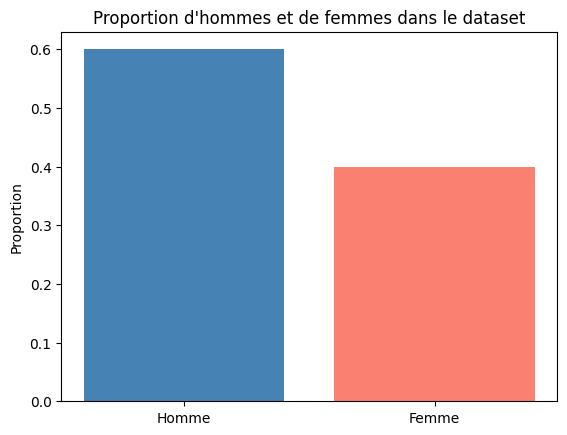

In [191]:
# Calcul des proportions
proportions = df1["genre"].value_counts(normalize=True).sort_index()

# Renommage des modalités
proportions.index = ["Homme", "Femme"]

# Couleurs par modalité
couleurs = ["steelblue", "salmon"]

# Graphique
plt.figure()
plt.bar(proportions.index, proportions.values, color=couleurs)
plt.ylabel("Proportion")
plt.title("Proportion d'hommes et de femmes dans le dataset")
plt.show()

Répartition des employés en fonction de leur niveau d'études

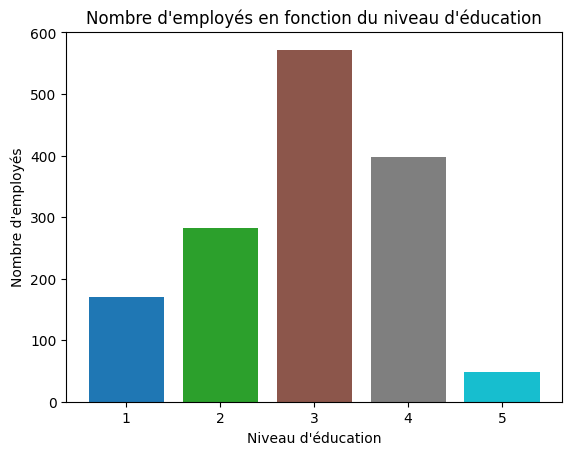

In [302]:
# Comptage des employés par niveau d'éducation
effectifs = df1["niveau_education"].value_counts().sort_index()

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(effectifs)))

# Graphique
plt.figure()
plt.bar(effectifs.index, effectifs.values, color=colors)
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre d'employés")
plt.title("Nombre d'employés en fonction du niveau d'éducation")
plt.show()

Répartition du nombre d'employés en fonction de l'âge

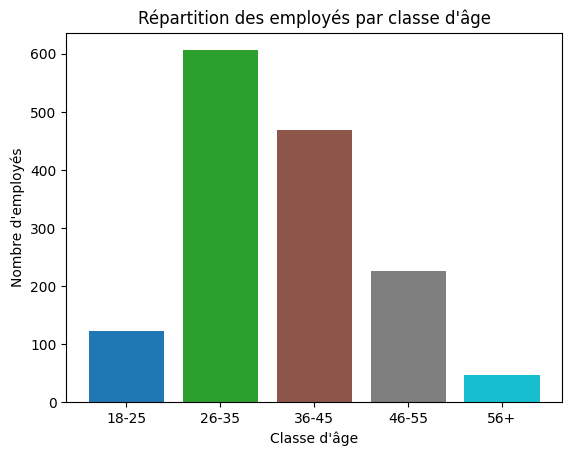

In [303]:
# Création des classes d'âge
bins = [18, 25, 35, 45, 55, 100]
labels = ["18-25", "26-35", "36-45", "46-55", "56+"]

df1["classe_age"] = pd.cut(
    df1["age"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Comptage par classe d'âge
effectifs = df1["classe_age"].value_counts().sort_index()

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(effectifs)))

# Graphique en barres
plt.figure()
plt.bar(effectifs.index.astype(str), effectifs.values, color=colors)
plt.xlabel("Classe d'âge")
plt.ylabel("Nombre d'employés")
plt.title("Répartition des employés par classe d'âge")
plt.show()

Répartition des employés par classe de revenu

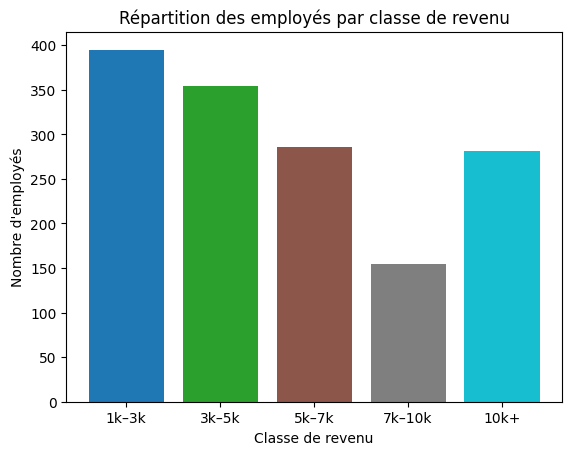

In [304]:
# Intervalle de revenu mensuel
bins = [1000, 3000, 5000, 7000, 10000, 20000]
labels = [
    "1k–3k",
    "3k–5k",
    "5k–7k",
    "7k–10k",
    "10k+"
]

df1["classe_revenu"] = pd.cut(
    df1["revenu_mensuel"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Comptage par classe de revenu
effectifs = df1["classe_revenu"].value_counts().sort_index()

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(effectifs)))

# Graphique en barres
plt.figure()
plt.bar(effectifs.index.astype(str), effectifs.values, color=colors)
plt.xlabel("Classe de revenu")
plt.ylabel("Nombre d'employés")
plt.title("Répartition des employés par classe de revenu")
plt.show()

Répartition des employés en fonction de leur domaine d'étude

In [192]:
# Liste des domaines (ordre unique et stable)
domaines = df1["domaine_etude"].unique()

# Palette de couleurs
palette = plt.cm.tab10(np.linspace(0, 1, len(domaines)))

# Dictionnaire domaine : couleur
couleurs_domaine = dict(zip(domaines, palette))

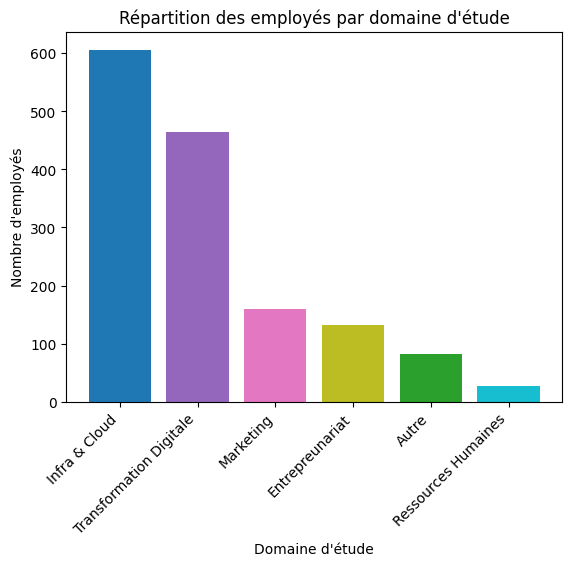

In [193]:
# Comptage des employés par domaine d'étude
effectifs = df1["domaine_etude"].value_counts()

# Graphiques en barres
plt.figure()
plt.bar(effectifs.index, effectifs.values, color=[couleurs_domaine[d] for d in effectifs.index])
plt.xlabel("Domaine d'étude")
plt.ylabel("Nombre d'employés")
plt.title("Répartition des employés par domaine d'étude")
plt.xticks(rotation=45, ha="right")
plt.show()

Répartition des employés en fonction du département

In [196]:
# Liste stable des départements
departements = df1["departement"].unique()

# Palette
palette = plt.cm.tab10(np.linspace(0, 1, len(departements)))

# Dictionnaire département → couleur
couleurs_departement = dict(zip(departements, palette))

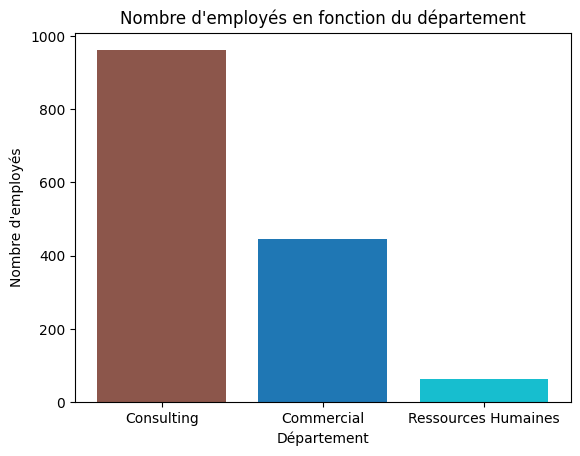

In [197]:
# Comptage des employés par niveau d'éducation
effectifs = df1["departement"].value_counts()

# Graphique
plt.figure()
plt.bar(effectifs.index, effectifs.values, color=[couleurs_departement[d] for d in effectifs.index])
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.title("Nombre d'employés en fonction du département")
plt.show()

Répartition des employés en fonction du poste occupé

In [200]:
# Liste stable des postes
postes = df1["poste"].unique()

# Palette
palette = plt.cm.tab10(np.linspace(0, 1, len(postes)))

# Dictionnaire poste → couleur
couleurs_poste = dict(zip(postes, palette))

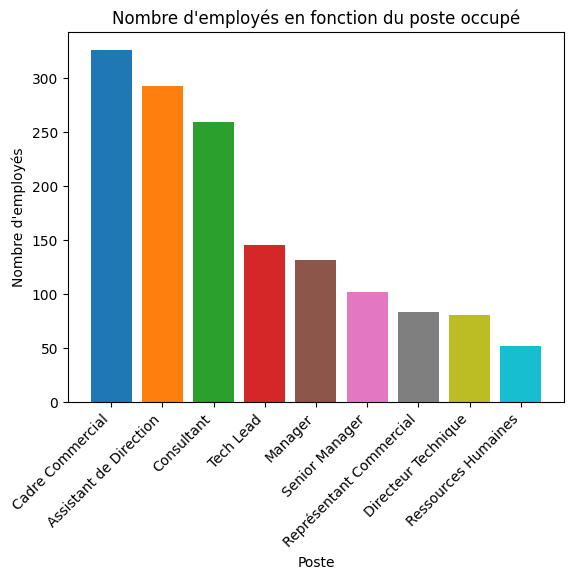

In [201]:
# Comptage des employés par poste occupé
effectifs = df1["poste"].value_counts()

# Graphique
plt.figure()
plt.bar(effectifs.index, effectifs.values, color=[couleurs_poste[p] for p in effectifs.index])
plt.xlabel("Poste")
plt.ylabel("Nombre d'employés")
plt.title("Nombre d'employés en fonction du poste occupé")
plt.xticks(rotation=45, ha="right")
plt.show()

Répartition des employés en fonction du niveau hiérarchique

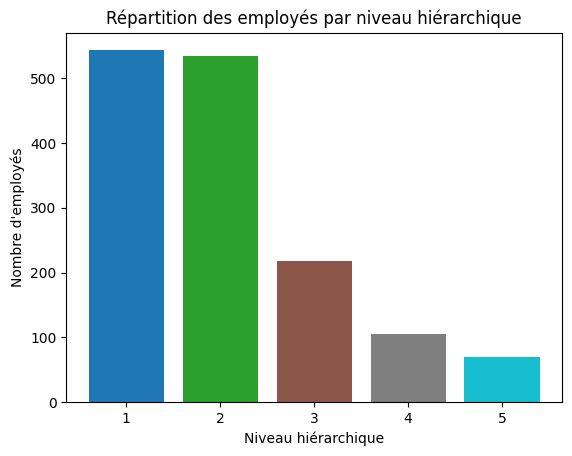

In [308]:
# Comptage des employés par niveau hiérarchique
effectifs = df1["niveau_hierarchique_poste"].value_counts()

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(effectifs)))

# Graphiques en barres
plt.figure()
plt.bar(effectifs.index, effectifs.values, color=colors)
plt.xlabel("Niveau hiérarchique")
plt.ylabel("Nombre d'employés")
plt.title("Répartition des employés par niveau hiérarchique")
plt.show()

Répartition des employés en fonction du nombre d'années passées dans l'entreprise

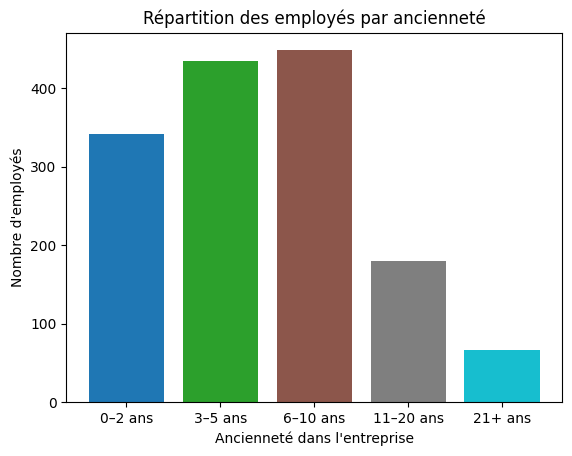

In [309]:
# Intervalle d'années
bins = [0, 2, 5, 10, 20, 40]
labels = [
    "0–2 ans",
    "3–5 ans",
    "6–10 ans",
    "11–20 ans",
    "21+ ans"
]

df1["classe_anciennete"] = pd.cut(
    df1["annees_dans_l_entreprise"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Comptage par classe d'ancienneté
effectifs = df1["classe_anciennete"].value_counts().sort_index()

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(effectifs)))

# Graphique en barres
plt.figure()
plt.bar(effectifs.index.astype(str), effectifs.values, color=colors)
plt.xlabel("Ancienneté dans l'entreprise")
plt.ylabel("Nombre d'employés")
plt.title("Répartition des employés par ancienneté")
plt.show()

Répartition des employés en fonction d'heures supplémentaires effectuées

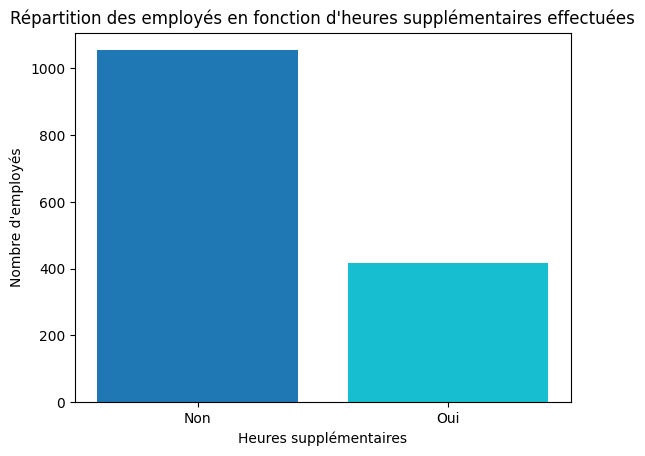

In [310]:
# Comptage par travail supplémentaire
effectifs = df1["heure_supplementaires"].value_counts().sort_index()

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(effectifs)))

# Renommer les modalités
effectifs.index = ["Non", "Oui"]

# Graphique
plt.figure()
plt.bar(effectifs.index, effectifs.values, color=colors)
plt.xlabel("Heures supplémentaires")
plt.ylabel("Nombre d'employés")
plt.title("Répartition des employés en fonction d'heures supplémentaires effectuées")
plt.show()

Répartition du nombre d'employés en fonction des augmentations de salaire

In [203]:
# Ordre logique des classes
labels = ["10–12 %", "12–15 %", "15–18 %", "18–22 %", "22 %+"]

# Palette fixe
palette = plt.cm.tab10(np.linspace(0, 1, len(labels)))

# Dictionnaire classe → couleur
couleurs_aug = dict(zip(labels, palette))

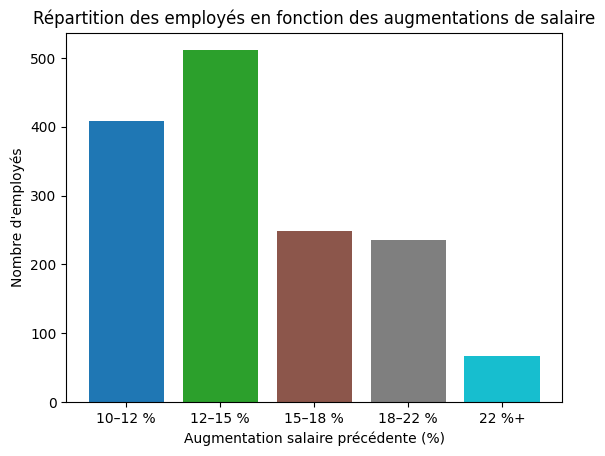

In [204]:
# Création des intervalles
bins = [10, 12, 15, 18, 22, 30]  # bornes adaptées

df1["classe_aug"] = pd.cut(
    df1["augmentation_salaire_precedente"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Comptage par classe d'augmentation
effectifs = (df1["classe_aug"].value_counts().reindex(labels))

# Graphique en barres
plt.figure()
plt.bar(effectifs.index, effectifs.values, color=[couleurs_aug[c] for c in effectifs.index])
plt.xlabel("Augmentation salaire précédente (%)")
plt.ylabel("Nombre d'employés")
plt.title("Répartition des employés en fonction des augmentations de salaire")
plt.show()

Taux de démission par genre

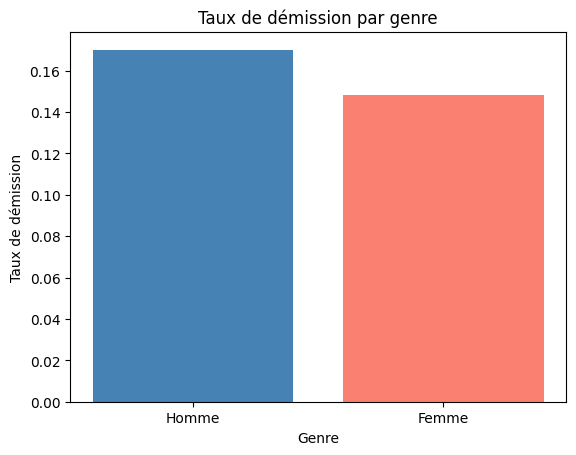

In [312]:
# Calcul du taux de démission par genre
taux_demission_genre = (df1.groupby("genre")["a_quitte_l_entreprise"].mean().sort_index())

# Renommer les modalités
taux_demission_genre.index = ["Homme", "Femme"]

# Couleurs par modalité
couleurs = ["steelblue", "salmon"]

# Graphique
plt.figure()
plt.bar(taux_demission_genre.index, taux_demission_genre.values, color=couleurs)
plt.xlabel("Genre")
plt.ylabel("Taux de démission")
plt.title("Taux de démission par genre")
plt.show()

Taux de démission en fonction de l'âge

C:\Users\cpier\AppData\Local\Temp\ipykernel_19576\629765425.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taux_demission_age = (df1.groupby("classe_age")["a_quitte_l_entreprise"].mean())


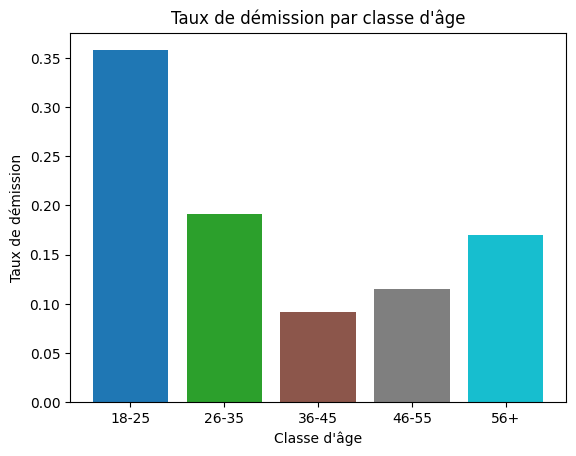

In [313]:
# Taux de démission par classe d'âge
taux_demission_age = (df1.groupby("classe_age")["a_quitte_l_entreprise"].mean())

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(taux_demission_age)))

# Graphique
plt.figure()
plt.bar(taux_demission_age.index.astype(str), taux_demission_age.values, color=colors)
plt.xlabel("Classe d'âge")
plt.ylabel("Taux de démission")
plt.title("Taux de démission par classe d'âge")
plt.show()

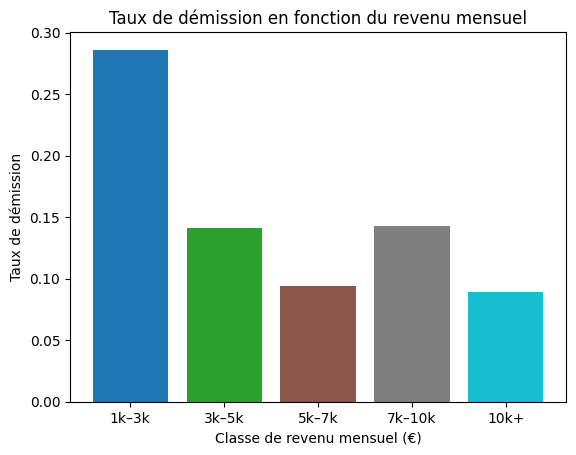

In [314]:
# Calcul du taux de démission par classe de revenu
taux_demission_revenu = (df1.groupby("classe_revenu", observed=True)["a_quitte_l_entreprise"].mean())

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(taux_demission_revenu)))

# Graphique en barres
plt.figure()
plt.bar(taux_demission_revenu.index.astype(str), taux_demission_revenu.values, color=colors)
plt.xlabel("Classe de revenu mensuel (€)")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction du revenu mensuel")
plt.show()

Taux de démission en fonction du domaine d'étude

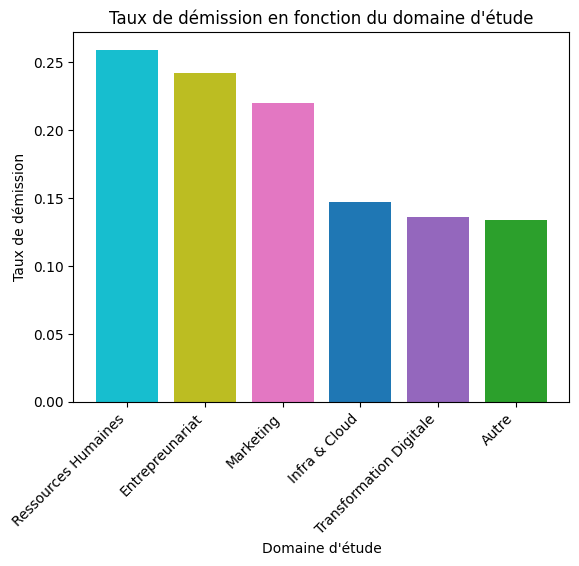

In [195]:
# Calcul du taux de démission par domaine d'étude
taux_demission_etude = (df1.groupby("domaine_etude", observed=True)["a_quitte_l_entreprise"].mean().sort_values(ascending=False))

# Graphique en barres
plt.figure()
plt.bar(
    taux_demission_etude.index,
    taux_demission_etude.values,
    color=[couleurs_domaine[d] for d in taux_demission_etude.index]
)
plt.xlabel("Domaine d'étude")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction du domaine d'étude")
plt.xticks(rotation=45, ha="right")
plt.show()

Taux de démission en fonction du département

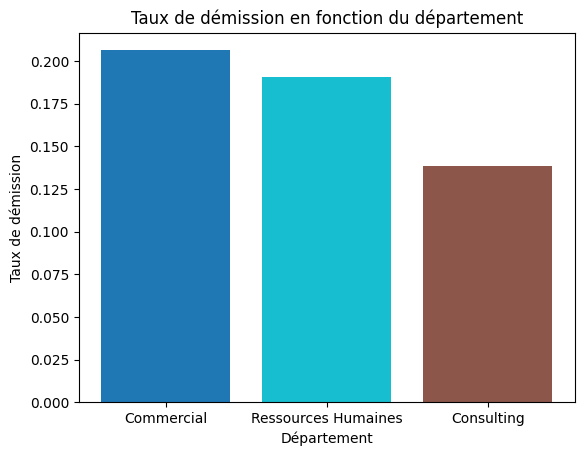

In [199]:
# Calcul du taux de démission par département
taux_demission_departement = (df1.groupby("departement", observed=True)["a_quitte_l_entreprise"].mean().sort_values(ascending=False))

# Graphique en barres
plt.figure()
plt.bar(taux_demission_departement.index, taux_demission_departement.values, color=[couleurs_departement[d] for d in taux_demission_departement.index])
plt.xlabel("Département")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction du département")
plt.show()

Taux de démission en fonction du poste occupé

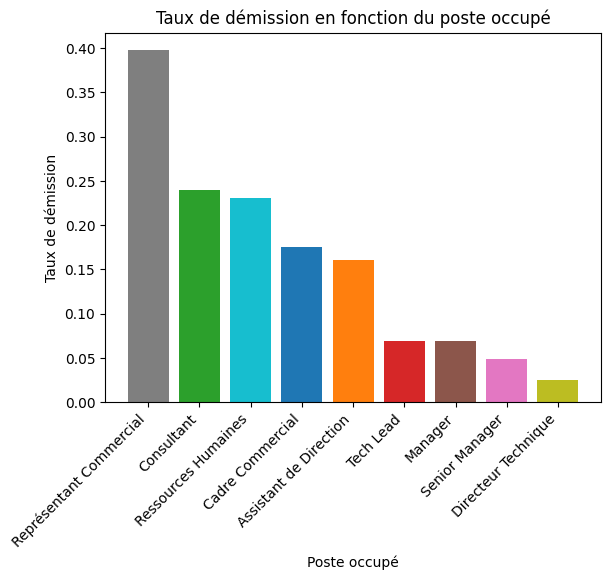

In [202]:
# Calcul du taux de démission par poste occupé
taux_demission_poste = (df1.groupby("poste", observed=True)["a_quitte_l_entreprise"].mean().sort_values(ascending=False))

# Graphique en barres
plt.figure()
plt.bar(taux_demission_poste.index, taux_demission_poste.values, color=[couleurs_poste[p] for p in taux_demission_poste.index])
plt.xlabel("Poste occupé")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction du poste occupé")
plt.xticks(rotation=45, ha="right")
plt.show()

Taux de démission en fonction du niveau hiérarchique

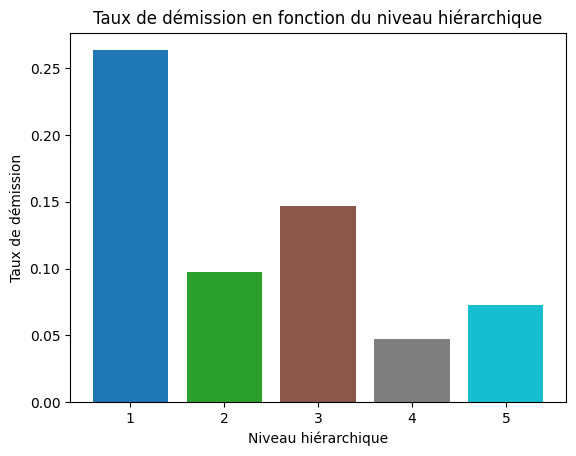

In [318]:
# Calcul du taux de démission par niveau hiérarchique
taux_demission_hierarchie = (df1.groupby("niveau_hierarchique_poste", observed=True)["a_quitte_l_entreprise"].mean())

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(taux_demission_hierarchie)))

# Graphique en barres
plt.figure()
plt.bar(taux_demission_hierarchie.index, taux_demission_hierarchie.values, color=colors)
plt.xlabel("Niveau hiérarchique")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction du niveau hiérarchique")
plt.show()

Taux de démission en fonction du nombre d'années passées dans l'entreprise

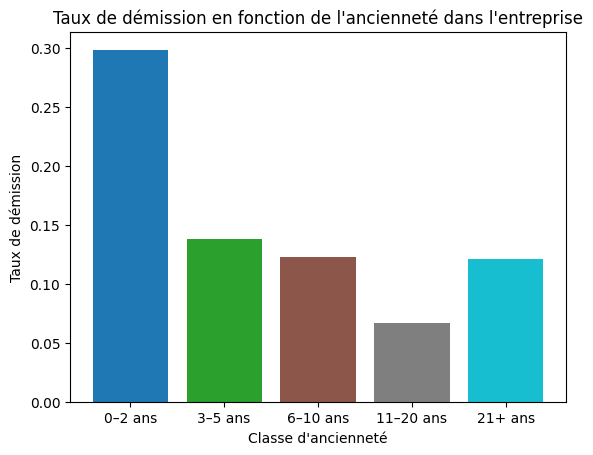

In [319]:
# Calcul du taux de démission par classe d'ancienneté
taux_demission_anciennete = (df1.groupby("classe_anciennete", observed=True)["a_quitte_l_entreprise"].mean())

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(taux_demission_anciennete)))

# Graphique en barres
plt.figure()
plt.bar(taux_demission_anciennete.index.astype(str), taux_demission_anciennete.values, color=colors)
plt.xlabel("Classe d'ancienneté")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction de l'ancienneté dans l'entreprise")
plt.show()

Taux de démission en fonction du niveau d'éducation

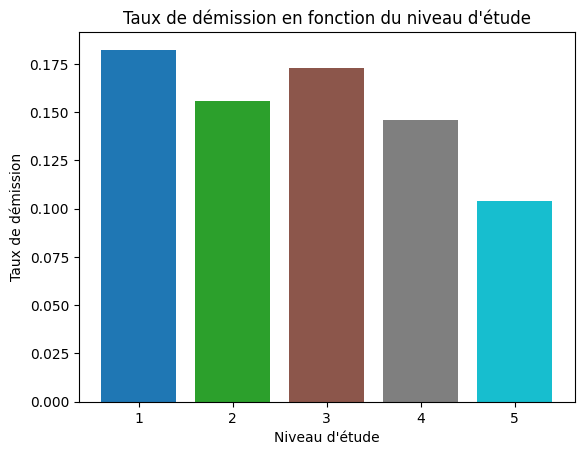

In [320]:
# Calcul du taux de démission par niveau d'étude
taux_demission_niveau_etude = (df1.groupby("niveau_education", observed=True)["a_quitte_l_entreprise"].mean())

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(taux_demission_niveau_etude)))

# Graphique en barres
plt.figure()
plt.bar(taux_demission_niveau_etude.index, taux_demission_niveau_etude.values, color=colors)
plt.xlabel("Niveau d'étude")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction du niveau d'étude")
plt.show()

Taux de démission en fonction d'heures supplémentaires effectuées

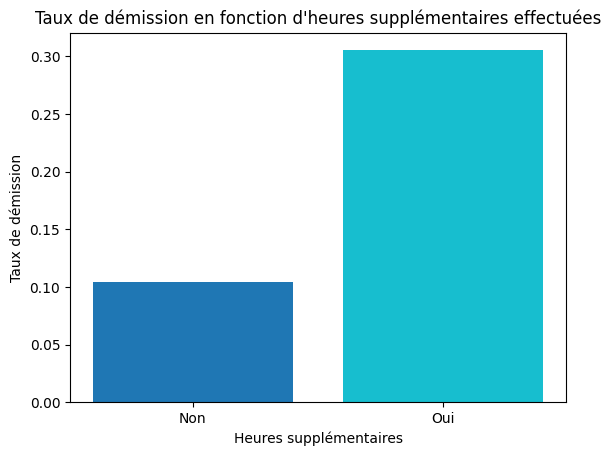

In [321]:
# Calcul du taux de démission par travail supplémentaire
taux_demission_heures = (df1.groupby("heure_supplementaires")["a_quitte_l_entreprise"].mean().sort_index())

# Renommer les modalités
taux_demission_heures.index = ["Non", "Oui"]

# Générer automatiquement les couleurs
colors = plt.cm.tab10(np.linspace(0, 1, len(taux_demission_heures)))

# Graphique
plt.figure()
plt.bar(taux_demission_heures.index, taux_demission_heures.values, color=colors)
plt.xlabel("Heures supplémentaires")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction d'heures supplémentaires effectuées")
plt.show()

Taux de démission en fonction des augmentations de salaire

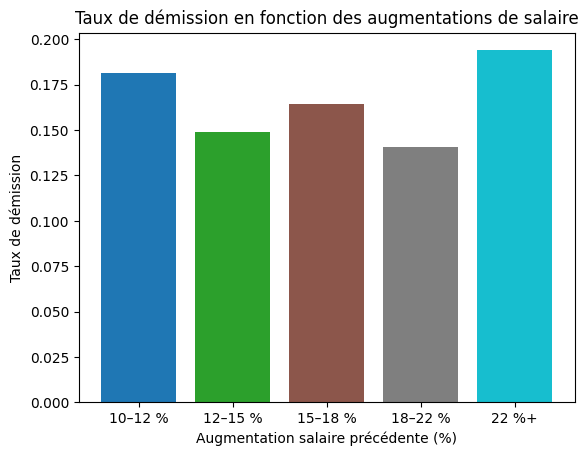

In [205]:
# Calcul du taux de démission par intervalle
taux_demission_aug = (df1.groupby("classe_aug", observed=True)["a_quitte_l_entreprise"].mean().reindex(labels))

# Graphiques en barres
plt.figure()
plt.bar(taux_demission_aug.index, taux_demission_aug.values, color=[couleurs_aug[c] for c in taux_demission_aug.index])
plt.xlabel("Augmentation salaire précédente (%)")
plt.ylabel("Taux de démission")
plt.title("Taux de démission en fonction des augmentations de salaire")
plt.show()

Faire pour statut marital et fréquence de déplacement

In [206]:
# Suppression
df1 = df1.drop(columns=["classe_aug"])

------------------------------------------------------

# Détection des valeurs aberrantes

Création d'une fonction qui, pour une variable quantitative, effectue automatiquement :
- Un histogramme (forme de la distribution)
- Un boxplot (détection visuelle des anomalies)
- La méthode IQR (borne inférieure / supérieure + outliers détectés)
- La méthode Z-score (outiers détectés par seuil > 3)
- Un récapitulatif clair des deux méthodes

### Explication de la méthode IQR : 

IQR veut dire InterQuartile Range, en français : écart interquartile. L’idée est de se concentrer sur le "cœur" des données, en regardant l’intervalle qui contient les 50 % des valeurs centrales.

On utilise pour ça :
- Q1 : le 1er quartile → 25 % des valeurs sont en dessous
- Q3 : le 3e quartile → 75 % des valeurs sont en dessous
- IQR = Q3 − Q1 : l’écart entre Q1 et Q3

IQR mesure la dispersion des données au centre, sans être trop influencé par les valeurs extrêmes.

On détecte les valeurs aberrantes avec l'IQR en appliquant une règle classique dite "de Tukey" : 
Une valeur est considérée aberrante si elle est :

* strictement plus petite que :  
    - Q1 − 1.5 × IQR  

* ou strictement plus grande que :  
    - Q3 + 1.5 × IQR

Ces deux formules donnent :

- une borne inférieure
- une borne supérieure

Tout ce qui est en dehors de ces bornes est vu comme potentiel outlier.  

Le boxplot (boîte à moustaches) est directement basé sur l’IQR :
- La boîte = de Q1 à Q3
- La ligne dans la boîte = médiane (50 %)
- Les "moustaches" vont jusqu’aux valeurs non aberrantes, donc limitées par Q1 − 1.5×IQR et Q3 + 1.5×IQR
- Les points isolés au-dessus ou en dessous = valeurs aberrantes

Donc, quand on fait un boxplot, on est déjà en train d’utiliser la méthode IQR.  

Avantages de la méthode IQR : 
- Robuste aux valeurs extrêmes (contrairement à la moyenne et à l’écart-type, qui peuvent être tirés par de gros outliers)
- Simple à comprendre (quartiles, intervalle central, bornes)
- Indépendante de la forme de la distribution (pas besoin de supposer une loi normale)

Limites de la méthode IQR : 
- Si la distribution est très asymétrique, la méthode peut considérer comme "aberrantes" des valeurs qui sont en fait logiques (ex : revenus très élevés dans un secteur)
- Elle se fait variable par variable, sans tenir compte des relations entre les variables (ex : âge + salaire + ancienneté)

Conclusion : La méthode IQR détecte les valeurs aberrantes en se basant sur la partie centrale des données (entre le 1er et le 3e quartile) et considère comme anormales celles qui sont trop loin de ce cœur, au-delà de 1,5 fois l’écart interquartile.

### Explication de la méthode Z-score : 

Le Z-score (ou score standardisé) mesure à quelle distance une valeur se trouve de la moyenne, exprimée en nombre d’écarts-types.

Formule : Z = (x−μ) / σ

Avec :  
x : la valeur observée  
μ : la moyenne  
σ : l’écart-type  

Interprétation du Z-score : 
- Z = 0 → la valeur est exactement égale à la moyenne
- Z = 1 → elle est 1 écart-type au-dessus de la moyenne
- Z = -1 → elle est 1 écart-type en dessous
- Z = 3 → elle est très éloignée (3 écarts-types au-dessus)  

Plus |Z| est grand, plus la valeur est rare ou atypique.  

**Détection des valeurs aberrantes (règle la plus utilisée) :**

On considère généralement qu’une valeur est aberrante si : ∣Z∣ > 3. Pourquoi ce seuil ?

Dans une distribution normale, 99,7 % des données se situent dans l’intervalle : [−3σ,+3σ]

Donc dépasser ce seuil signifie que la valeur appartient aux 0,3 % les plus extrêmes, ce qui est rare → souvent un outlier.

Source : [Datacamp](https://www.datacamp.com/fr/tutorial/z-score)  

Avantages de la méthode Z-score : 
- Simple à calculer (une seule formule, très utilisée en statistiques)
- Standardisation utile (permet de comparer des variables avec des unités différentes (euros, années, notes...))
- Efficace pour les distributions proches de la normale  

Limites de la méthode Z-score : 
- Suppose que les données sont à peu près normales
- Sensible aux outliers eux-mêmes (quelques valeurs extrêmes peuvent augmenter artificialement l’écart-type rendant d’autres outliers difficiles à détecter)
- Ne détecte pas les outliers multivariés (quelqu’un avec un faible âge + haute ancienneté → contradiction, mais pas forcément un Z-score extrême)  

Conclusion : Le Z-score mesure à combien d’écarts-types une valeur se situe de la moyenne, et permet d’identifier comme aberrantes les observations trop éloignées (|Z| > 3), particulièrement efficace si la distribution est proche de la normale.

In [ ]:
# Définition d'une fonction qui analyse les valeurs aberrantes (outliers) d'une colonne d'un DataFrame
def analyse_outliers(df, col):
    # Affiche le nom de la colonne analysée
    print(f"\n=== Analyse des outliers pour : {col} ===")
    
    # On sélectionne la colonne et on supprime les valeurs manquantes
    series = df[col].dropna()
    
   
    # 1) Visualisation de la distribution des valeurs (histogramme)
    
    # Création d'une figure pour l'histogramme
    plt.figure(figsize=(12, 4))
    # Création de l'histogramme avec 30 classes
    plt.hist(series, bins=30)
    # Ajout du titre et des labels
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Effectifs")
    # Affichage du graphique
    plt.show()
    
    
    # 2) Visualisation des outliers de manière graphique (Boxplot)
    
    # Création d'une figure pour le boxplot
    plt.figure(figsize=(6, 4))
    # Création du boxplot
    plt.boxplot(series)
    # Ajout du titre
    plt.title(f"Boxplot de {col}")
    # Affichage du graphique
    plt.show()
    
    
    # 3) Détection des outliers à l'aide de l'écart interquartile (IQR)
    
    # Calcul du premier quartile (25 %)
    Q1 = series.quantile(0.25)
    # Calcul du troisième quartile (75 %)
    Q3 = series.quantile(0.75)
    # Calcul de l'IQR (écart interquartile)
    IQR = Q3 - Q1
    # Calcul de la borne inférieure des valeurs normales
    borne_inf = Q1 - 1.5 * IQR
    # Calcul de la borne supérieure des valeurs normales
    borne_sup = Q3 + 1.5 * IQR
    
    # Sélection des lignes contenant des valeurs en dehors des bornes IQR
    outliers_iqr = df[(df[col] < borne_inf) | (df[col] > borne_sup)]
    
    # Affichage des résultats de la méthode IQR
    print("\n--- Méthode IQR ---")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Borne inférieure = {borne_inf:.2f}")
    print(f"Borne supérieure = {borne_sup:.2f}")
    print(f"Nombre d'outliers IQR détectés : {outliers_iqr.shape[0]}")
    
    
    # 4) Détection des outliers basée sur l'écart à la moyenne (méthode Z-score)
    
    # Calcul des Z-scores (distance à la moyenne en nombre d'écarts-types)
    zscores = np.abs(stats.zscore(series))
    # Sélection des valeurs dont le Z-score est supérieur à 3
    outliers_z = df[zscores > 3]
    
    # Affichage des résultats de la méthode Z-score
    print("\n--- Méthode Z-score ---")
    print(f"Nombre d'outliers Z-score détectés : {outliers_z.shape[0]}")
    
    
    # 5) Comparaison des résultats des deux méthodes (synthèse)
    
    print("\n=== Synthèse des deux méthodes ===")
    print(f"• Outliers IQR       : {outliers_iqr.shape[0]}")
    print(f"• Outliers Z-score   : {outliers_z.shape[0]}")
    
    # Récupération des indices des outliers détectés par chaque méthode
    indices_iqr = set(outliers_iqr.index)
    indices_z = set(outliers_z.index)
    
    # Calcul des indices communs aux deux méthodes
    intersection = indices_iqr.intersection(indices_z)
    
    # Affichage du nombre d'outliers communs
    print(f"• Outliers communs   : {len(intersection)}")
    
    # Interprétation des résultats
    if len(intersection) > 0:
        print("→ Les deux méthodes identifient des points similaires : anomalies confirmées.")
    else:
        print("→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.")
    
    # Retourne les résultats sous forme de dictionnaire
    return {
        "outliers_iqr": outliers_iqr,
        "outliers_z": outliers_z,
        "outliers_communs": df.loc[list(intersection)]
    }



=== Analyse des outliers pour : nb_formations_suivies ===


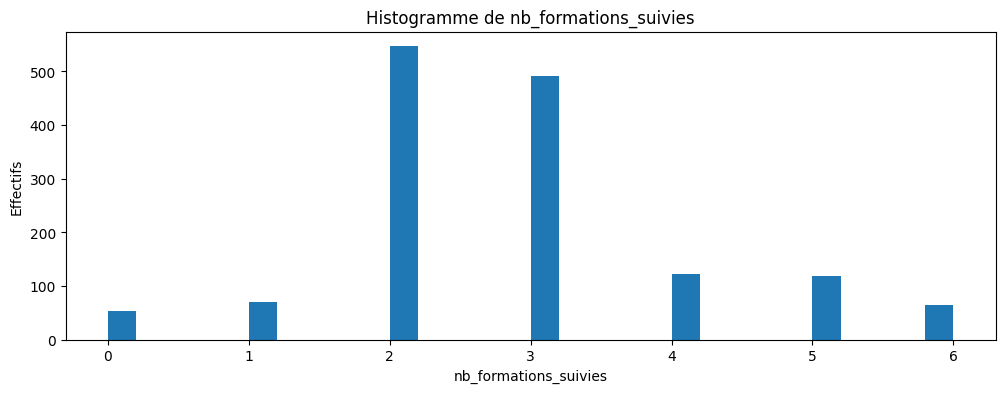

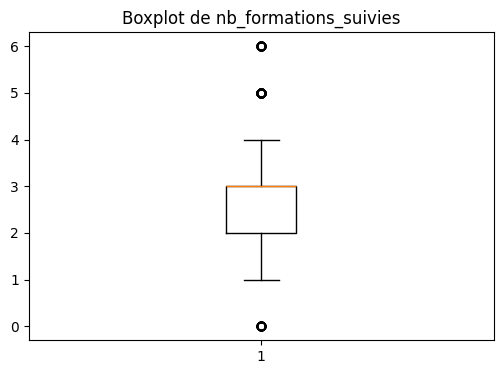


--- Méthode IQR ---
Q1 = 2.00, Q3 = 3.00, IQR = 1.00
Borne inférieure = 0.50
Borne supérieure = 4.50
Nombre d'outliers IQR détectés : 238

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 0

=== Synthèse des deux méthodes ===
• Outliers IQR       : 238
• Outliers Z-score   : 0
• Outliers communs   : 0
→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.

=== Analyse des outliers pour : distance_domicile_travail ===


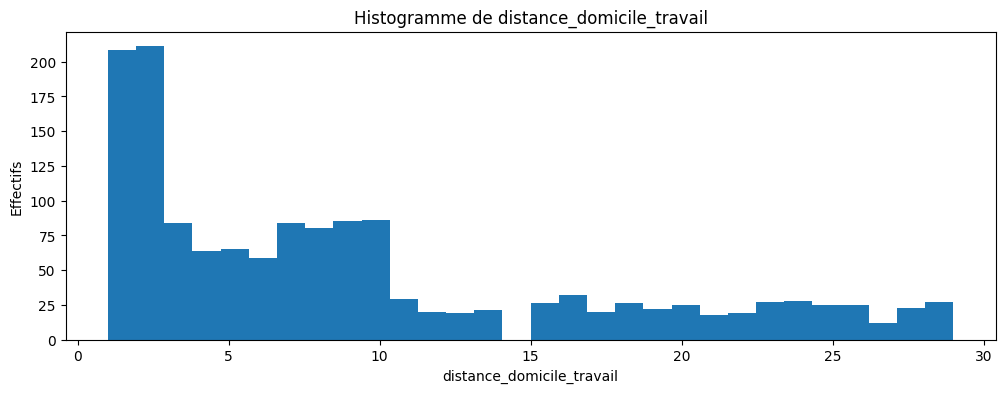

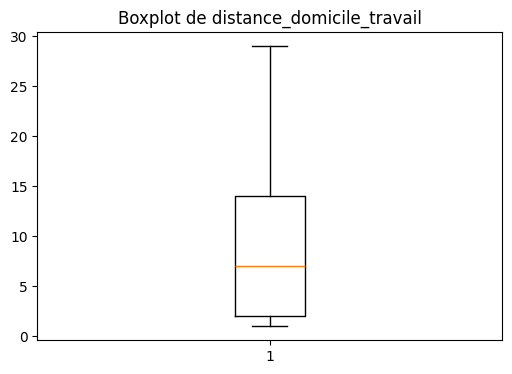


--- Méthode IQR ---
Q1 = 2.00, Q3 = 14.00, IQR = 12.00
Borne inférieure = -16.00
Borne supérieure = 32.00
Nombre d'outliers IQR détectés : 0

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 0

=== Synthèse des deux méthodes ===
• Outliers IQR       : 0
• Outliers Z-score   : 0
• Outliers communs   : 0
→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.

=== Analyse des outliers pour : niveau_education ===


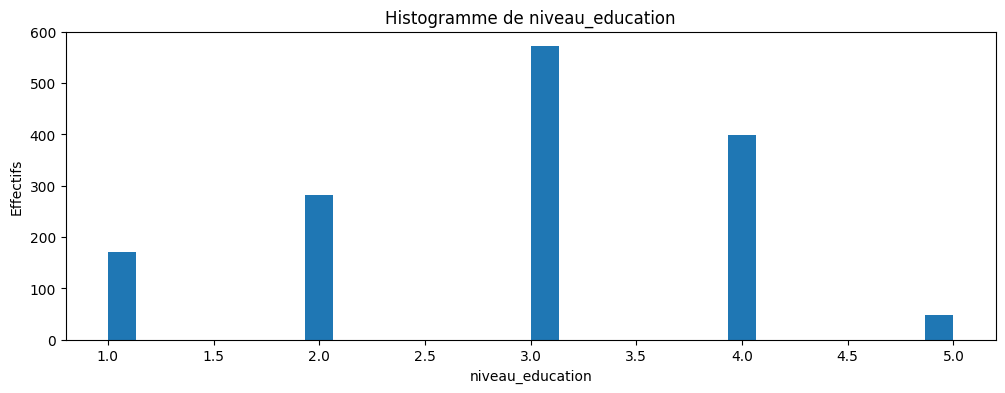

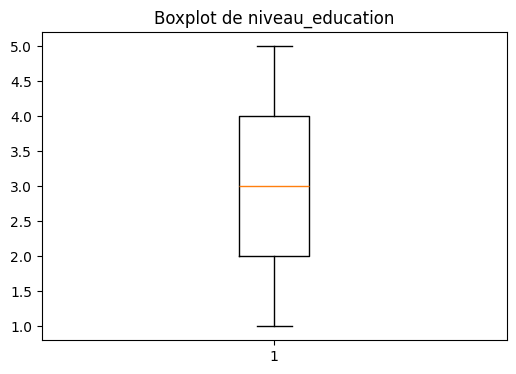


--- Méthode IQR ---
Q1 = 2.00, Q3 = 4.00, IQR = 2.00
Borne inférieure = -1.00
Borne supérieure = 7.00
Nombre d'outliers IQR détectés : 0

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 0

=== Synthèse des deux méthodes ===
• Outliers IQR       : 0
• Outliers Z-score   : 0
• Outliers communs   : 0
→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.

=== Analyse des outliers pour : annees_depuis_la_derniere_promotion ===


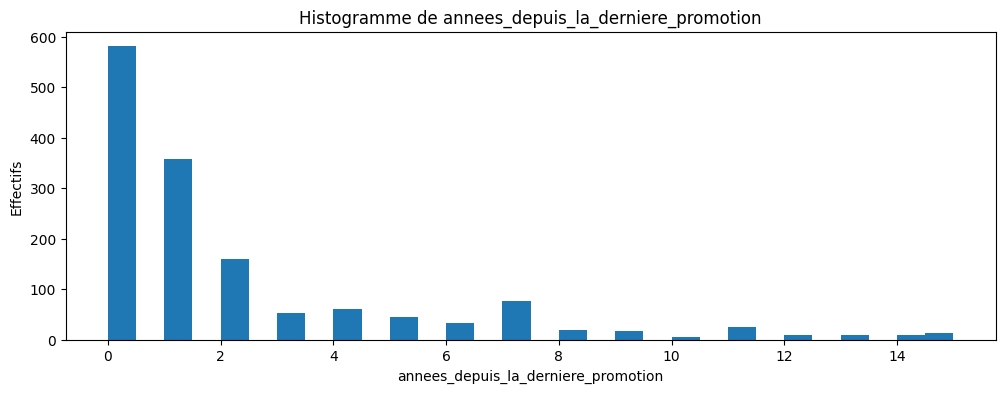

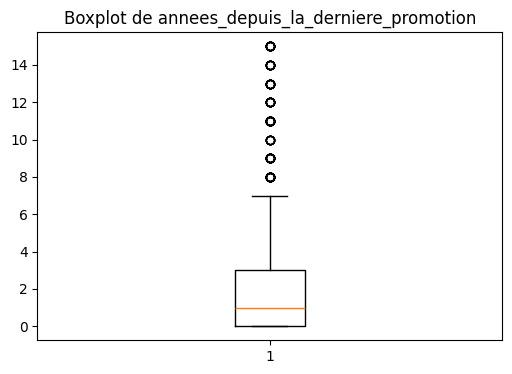


--- Méthode IQR ---
Q1 = 0.00, Q3 = 3.00, IQR = 3.00
Borne inférieure = -4.50
Borne supérieure = 7.50
Nombre d'outliers IQR détectés : 107

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 42

=== Synthèse des deux méthodes ===
• Outliers IQR       : 107
• Outliers Z-score   : 42
• Outliers communs   : 42
→ Les deux méthodes identifient des points similaires : anomalies confirmées.

=== Analyse des outliers pour : annes_sous_responsable_actuel ===


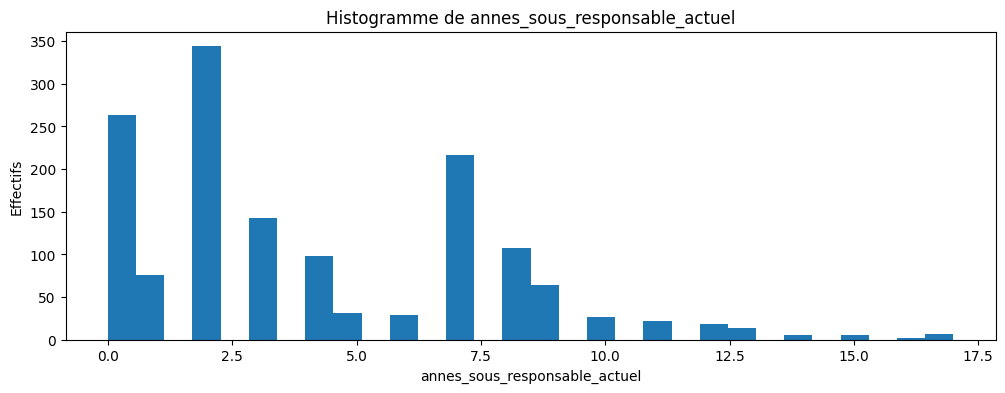

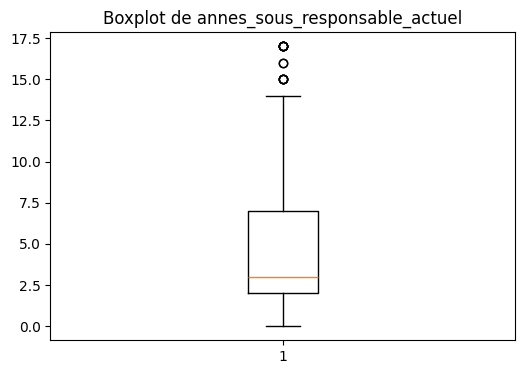


--- Méthode IQR ---
Q1 = 2.00, Q3 = 7.00, IQR = 5.00
Borne inférieure = -5.50
Borne supérieure = 14.50
Nombre d'outliers IQR détectés : 14

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 14

=== Synthèse des deux méthodes ===
• Outliers IQR       : 14
• Outliers Z-score   : 14
• Outliers communs   : 14
→ Les deux méthodes identifient des points similaires : anomalies confirmées.

=== Analyse des outliers pour : age ===


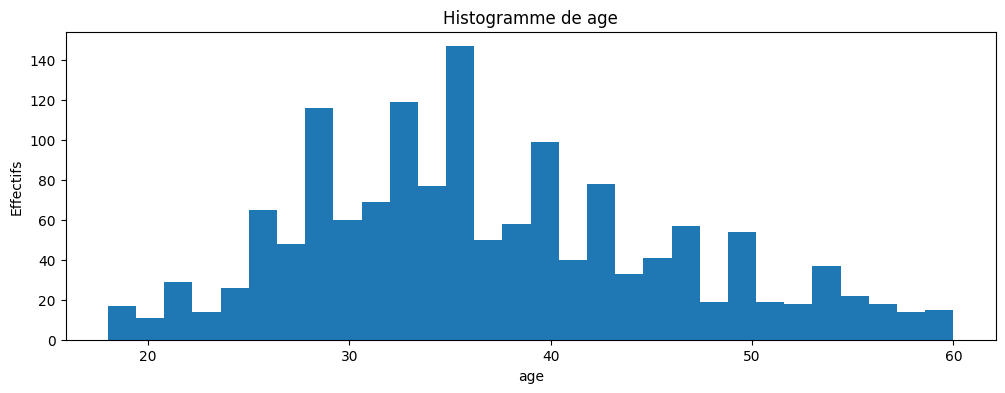

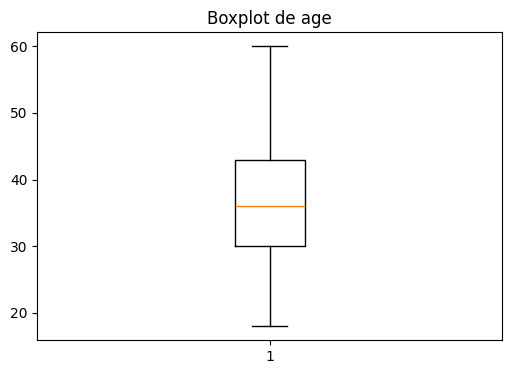


--- Méthode IQR ---
Q1 = 30.00, Q3 = 43.00, IQR = 13.00
Borne inférieure = 10.50
Borne supérieure = 62.50
Nombre d'outliers IQR détectés : 0

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 0

=== Synthèse des deux méthodes ===
• Outliers IQR       : 0
• Outliers Z-score   : 0
• Outliers communs   : 0
→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.

=== Analyse des outliers pour : revenu_mensuel ===


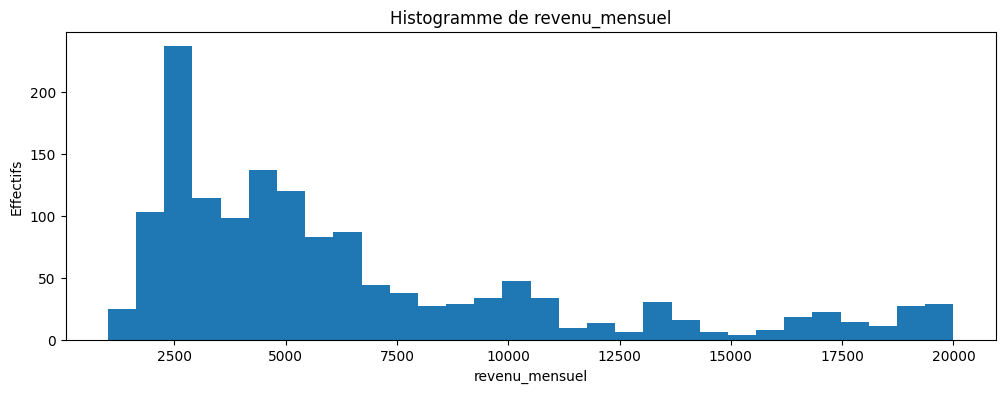

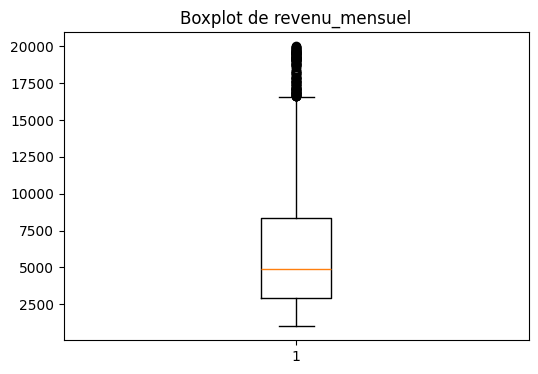


--- Méthode IQR ---
Q1 = 2911.00, Q3 = 8379.00, IQR = 5468.00
Borne inférieure = -5291.00
Borne supérieure = 16581.00
Nombre d'outliers IQR détectés : 114

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 0

=== Synthèse des deux méthodes ===
• Outliers IQR       : 114
• Outliers Z-score   : 0
• Outliers communs   : 0
→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.

=== Analyse des outliers pour : nombre_experiences_precedentes ===


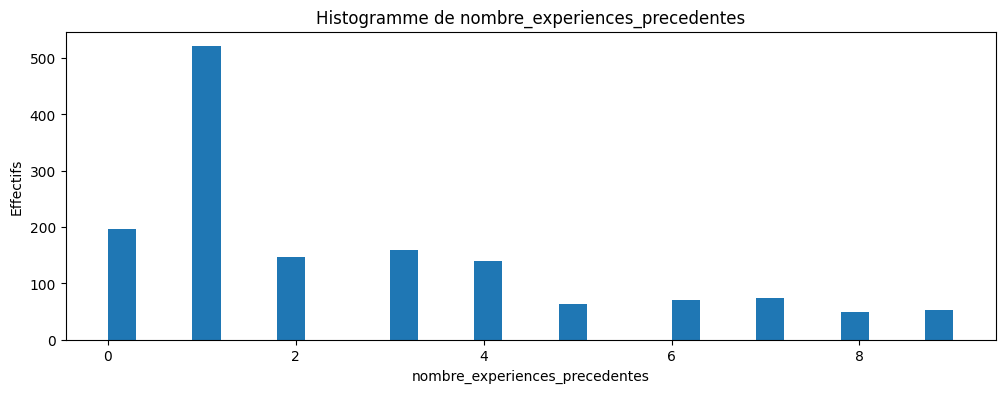

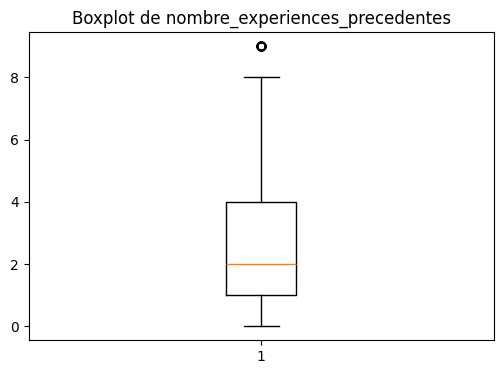


--- Méthode IQR ---
Q1 = 1.00, Q3 = 4.00, IQR = 3.00
Borne inférieure = -3.50
Borne supérieure = 8.50
Nombre d'outliers IQR détectés : 52

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 0

=== Synthèse des deux méthodes ===
• Outliers IQR       : 52
• Outliers Z-score   : 0
• Outliers communs   : 0
→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.

=== Analyse des outliers pour : annee_experience_totale ===


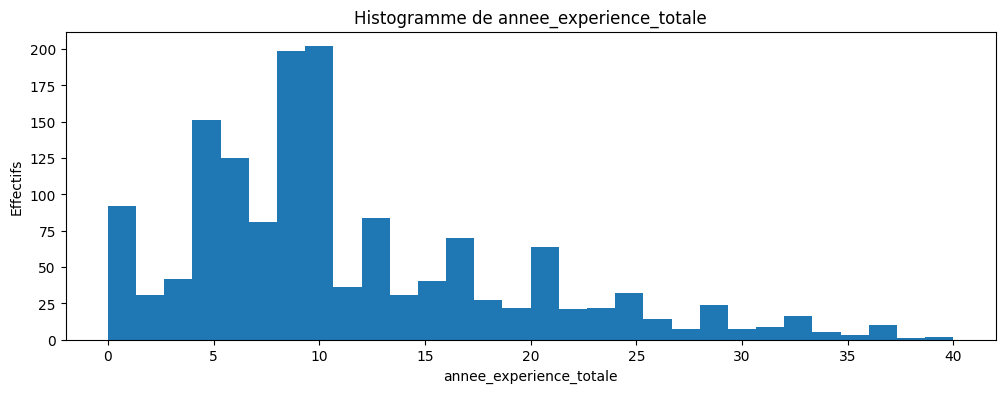

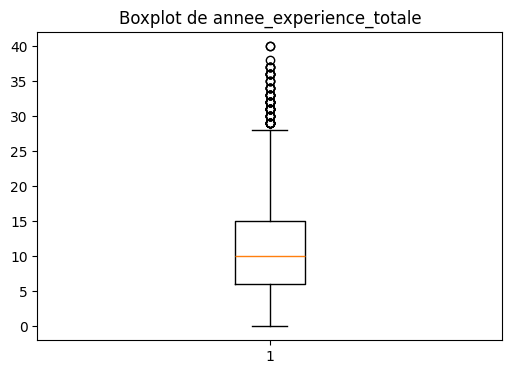


--- Méthode IQR ---
Q1 = 6.00, Q3 = 15.00, IQR = 9.00
Borne inférieure = -7.50
Borne supérieure = 28.50
Nombre d'outliers IQR détectés : 63

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 16

=== Synthèse des deux méthodes ===
• Outliers IQR       : 63
• Outliers Z-score   : 16
• Outliers communs   : 16
→ Les deux méthodes identifient des points similaires : anomalies confirmées.

=== Analyse des outliers pour : annees_dans_l_entreprise ===


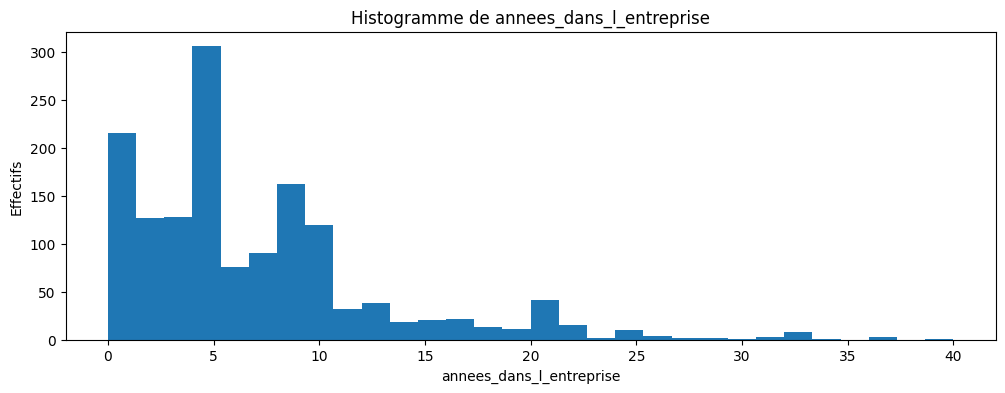

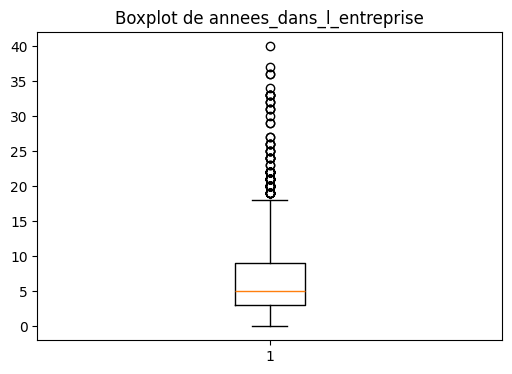


--- Méthode IQR ---
Q1 = 3.00, Q3 = 9.00, IQR = 6.00
Borne inférieure = -6.00
Borne supérieure = 18.00
Nombre d'outliers IQR détectés : 104

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 25

=== Synthèse des deux méthodes ===
• Outliers IQR       : 104
• Outliers Z-score   : 25
• Outliers communs   : 25
→ Les deux méthodes identifient des points similaires : anomalies confirmées.

=== Analyse des outliers pour : annees_dans_le_poste_actuel ===


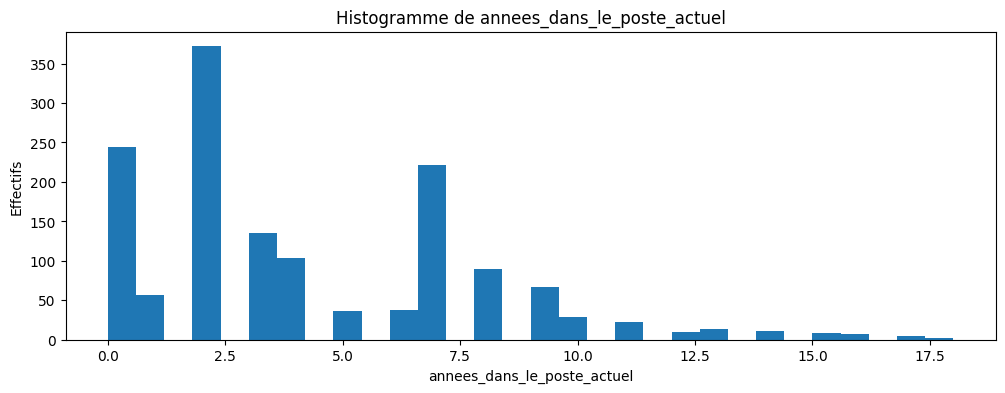

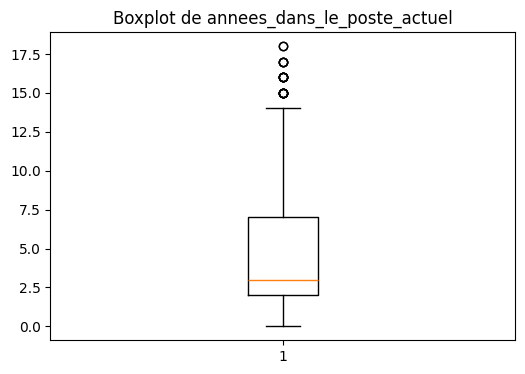


--- Méthode IQR ---
Q1 = 2.00, Q3 = 7.00, IQR = 5.00
Borne inférieure = -5.50
Borne supérieure = 14.50
Nombre d'outliers IQR détectés : 21

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 13

=== Synthèse des deux méthodes ===
• Outliers IQR       : 21
• Outliers Z-score   : 13
• Outliers communs   : 13
→ Les deux méthodes identifient des points similaires : anomalies confirmées.

=== Analyse des outliers pour : augmentation_salaire_precedente ===


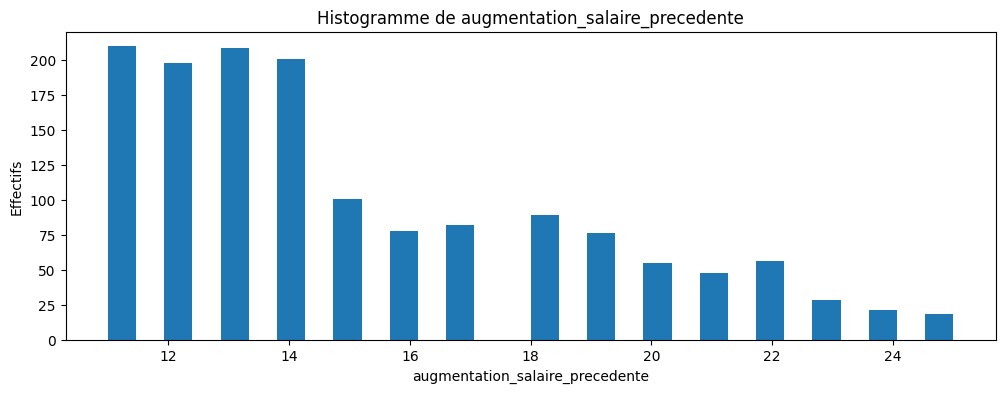

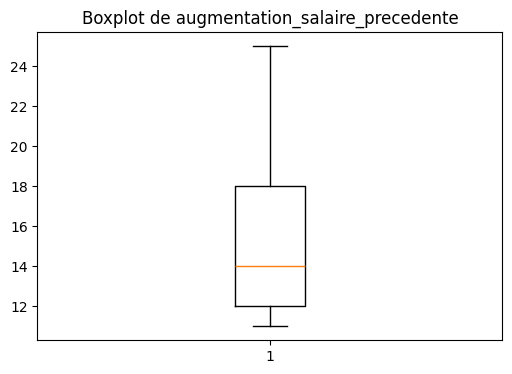


--- Méthode IQR ---
Q1 = 12.00, Q3 = 18.00, IQR = 6.00
Borne inférieure = 3.00
Borne supérieure = 27.00
Nombre d'outliers IQR détectés : 0

--- Méthode Z-score ---
Nombre d'outliers Z-score détectés : 0

=== Synthèse des deux méthodes ===
• Outliers IQR       : 0
• Outliers Z-score   : 0
• Outliers communs   : 0
→ Peu ou pas d'outliers communs : vérifier la distribution ou adapter les seuils.


In [112]:
# Pour plusieurs variables
variables_a_tester = [
"nb_formations_suivies",
"distance_domicile_travail",
"niveau_education",
"annees_depuis_la_derniere_promotion",
"annes_sous_responsable_actuel",
"age",
"revenu_mensuel",
"nombre_experiences_precedentes",
"annee_experience_totale",
"annees_dans_l_entreprise",
"annees_dans_le_poste_actuel",
"augmentation_salaire_precedente"
]

for col in variables_a_tester:
    analyse_outliers(df1, col)

### Méthode Isolation Forest

Pour détecter des outliers multivariés, les méthodes univariées comme l’IQR ou le Z-score ne suffisent pas, car elles analysent chaque variable séparément. L'approche multivariée comme l’Isolation Forest permet d’identifier des observations atypiques en tenant compte de la structure globale des données et des relations entre les variables.

In [ ]:
# Sélection des colonnes quantitatives (numériques) du DataFrame df1
variables_quanti = df1.select_dtypes(include="number").columns

# Création du modèle Isolation Forest pour la détection d'outliers, contamination=0.01 signifie que l'on s'attend à environ 1 % d'outliers et random_state permet de rendre les résultats reproductibles
iso = IsolationForest(contamination=0.01, random_state=42)
# Entraînement du modèle sur les variables quantitatives et prédiction des labels d'outliers pour chaque observation
labels = iso.fit_predict(df1[variables_quanti])

# Création d'une nouvelle colonne indiquant les outliers, -1 correspond à un outlier, 1 correspond à une observation normale. On convertit ce résultat en 1 (outlier) ou 0 (normal)
df1["outlier_iforest"] = (labels == -1).astype(int)

# Comptage du nombre d'observations normales et aberrantes détectées
df1["outlier_iforest"].value_counts()

outlier_iforest
0    1455
1      15
Name: count, dtype: int64

Sur 1470 employés, 15 ont un profil global qui ne ressemble pas au reste des employés. 

Le code suivant permet de nous donner pour chaque observation identifiée comme outlier par Isolation Forest, quelles variables dévient fortement des valeurs normales. 

La méthode consiste à comparer chaque outlier à la distribution normale des données à l’aide d’un Z-score multivarié, mais calculé variable par variable :

- Si |Z| > 2.5 → valeur fortement atypique
- Si |Z| > 3 → valeur très atypique

C’est simple, universel, et marche bien même si l’Isolation Forest a repéré l’outlier pour une combinaison de variables.

In [ ]:
# Sélection des variables quantitatives
vars_quanti = df1.select_dtypes(include="number").columns

# Calcul des Z-scores pour toutes les variables quantitatives
z_scores = df1[vars_quanti].apply(lambda x: zscore(x, nan_policy='omit'))

# Définition du seuil au-delà duquel une valeur est considérée comme anormale
SEUIL = 2.5

# Récupération des indices des observations détectées comme outliers par Isolation Forest
outliers_index = df1[df1["outlier_iforest"] == 1].index

# Dictionnaire qui va stocker les explications pour chaque outlier
explications = {}

# Boucle sur chaque observation identifiée comme outlier
for idx in outliers_index:
    # Récupération des valeurs quantitatives de la ligne concernée
    ligne = df1.loc[idx, vars_quanti]
    # Récupération des Z-scores correspondants pour cette même ligne
    z_ligne = z_scores.loc[idx]

    # Sélection des variables dont le Z-score dépasse le seuil en valeur absolue
    variables_anormales = z_ligne[abs(z_ligne) > SEUIL]

    # Stockage des informations explicatives dans le dictionnaire
    explications[idx] = {
        # Liste des variables considérées comme anormales
        "variables_anormales": variables_anormales.index.tolist(),
        # Valeurs réelles de ces variables dans la ligne
        "valeurs": ligne[variables_anormales.index].to_dict(),
        # Z-scores associés à ces variables
        "z_scores": z_ligne[variables_anormales.index].to_dict()
    }

# Affichage lisible des explications pour chaque outlier
for idx, info in explications.items():
    # Titre indiquant l'observation analysée
    print(f"\n===== OUTLIER {idx} =====")
    # Cas où aucune variable individuelle ne dépasse le seuil
    if len(info["variables_anormales"]) == 0:
        print("Aucune variable individuelle fortement atypique. L'anomalie vient probablement d'une combinaison de variables.")
    else:
        # Cas où des variables anormales sont identifiées
        print("Variables anormales détectées :")
        # Détail des variables anormales
        for var in info["variables_anormales"]:
            print(f" - {var} : valeur = {info['valeurs'][var]}, Z = {info['z_scores'][var]:.2f}")


===== OUTLIER 45 =====
Variables anormales détectées :
 - annees_depuis_la_derniere_promotion : valeur = 15, Z = 3.98
 - revenu_mensuel : valeur = 19545, Z = 2.77
 - annees_dans_le_poste_actuel : valeur = 15, Z = 2.97
 - niveau_hierarchique_poste : valeur = 5, Z = 2.65
 - outlier_iforest : valeur = 1, Z = 9.85

===== OUTLIER 123 =====
Variables anormales détectées :
 - annees_depuis_la_derniere_promotion : valeur = 15, Z = 3.98
 - annes_sous_responsable_actuel : valeur = 15, Z = 3.05
 - revenu_mensuel : valeur = 19537, Z = 2.77
 - annees_dans_le_poste_actuel : valeur = 18, Z = 3.80
 - niveau_hierarchique_poste : valeur = 5, Z = 2.65
 - outlier_iforest : valeur = 1, Z = 9.85

===== OUTLIER 126 =====
Variables anormales détectées :
 - annees_depuis_la_derniere_promotion : valeur = 15, Z = 3.98
 - annee_experience_totale : valeur = 40, Z = 3.69
 - annees_dans_l_entreprise : valeur = 40, Z = 5.39
 - outlier_iforest : valeur = 1, Z = 9.85

===== OUTLIER 171 =====
Variables anormales détect

In [115]:
# Suppression
df1 = df1.drop(columns=["outlier_iforest"])

Valeurs aberrantes pour variables qualitatives

In [ ]:
variables_qualitatives = [
    "domaine_etude",
    "frequence_deplacement",
    "statut_marital",
    "departement",
    "poste"
]

# Boucle sur chaque variable qualitative (catégorielle)
for col in variables_qualitatives:
    # Affiche le nom de la variable analysée
    print(f"\n===== Modalités pour {col} =====")
    # Affiche le nombre d'occurrences de chaque modalité, dropna=False permet d'inclure les valeurs manquantes dans le comptage
    print(df1[col].value_counts(dropna=False))


===== Modalités pour domaine_etude =====
domaine_etude
Infra & Cloud              606
Transformation Digitale    464
Marketing                  159
Entrepreunariat            132
Autre                       82
Ressources Humaines         27
Name: count, dtype: int64

===== Modalités pour frequence_deplacement =====
frequence_deplacement
Occasionnel    1043
Frequent        277
Aucun           150
Name: count, dtype: int64

===== Modalités pour statut_marital =====
statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64

===== Modalités pour departement =====
departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64

===== Modalités pour poste =====
poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Techniq

Il existe des outliers mais dans notre cas ils sont légitime et donc à ne pas supprimer car important pour l'analyse : approche conservatrice

--------------------------------------------------------

# Corrélation (variables quantitatives)

In [117]:
# Suppression
df1 = df1.drop(columns=["id_employee"])

Pairplot pour les variables quantitatives

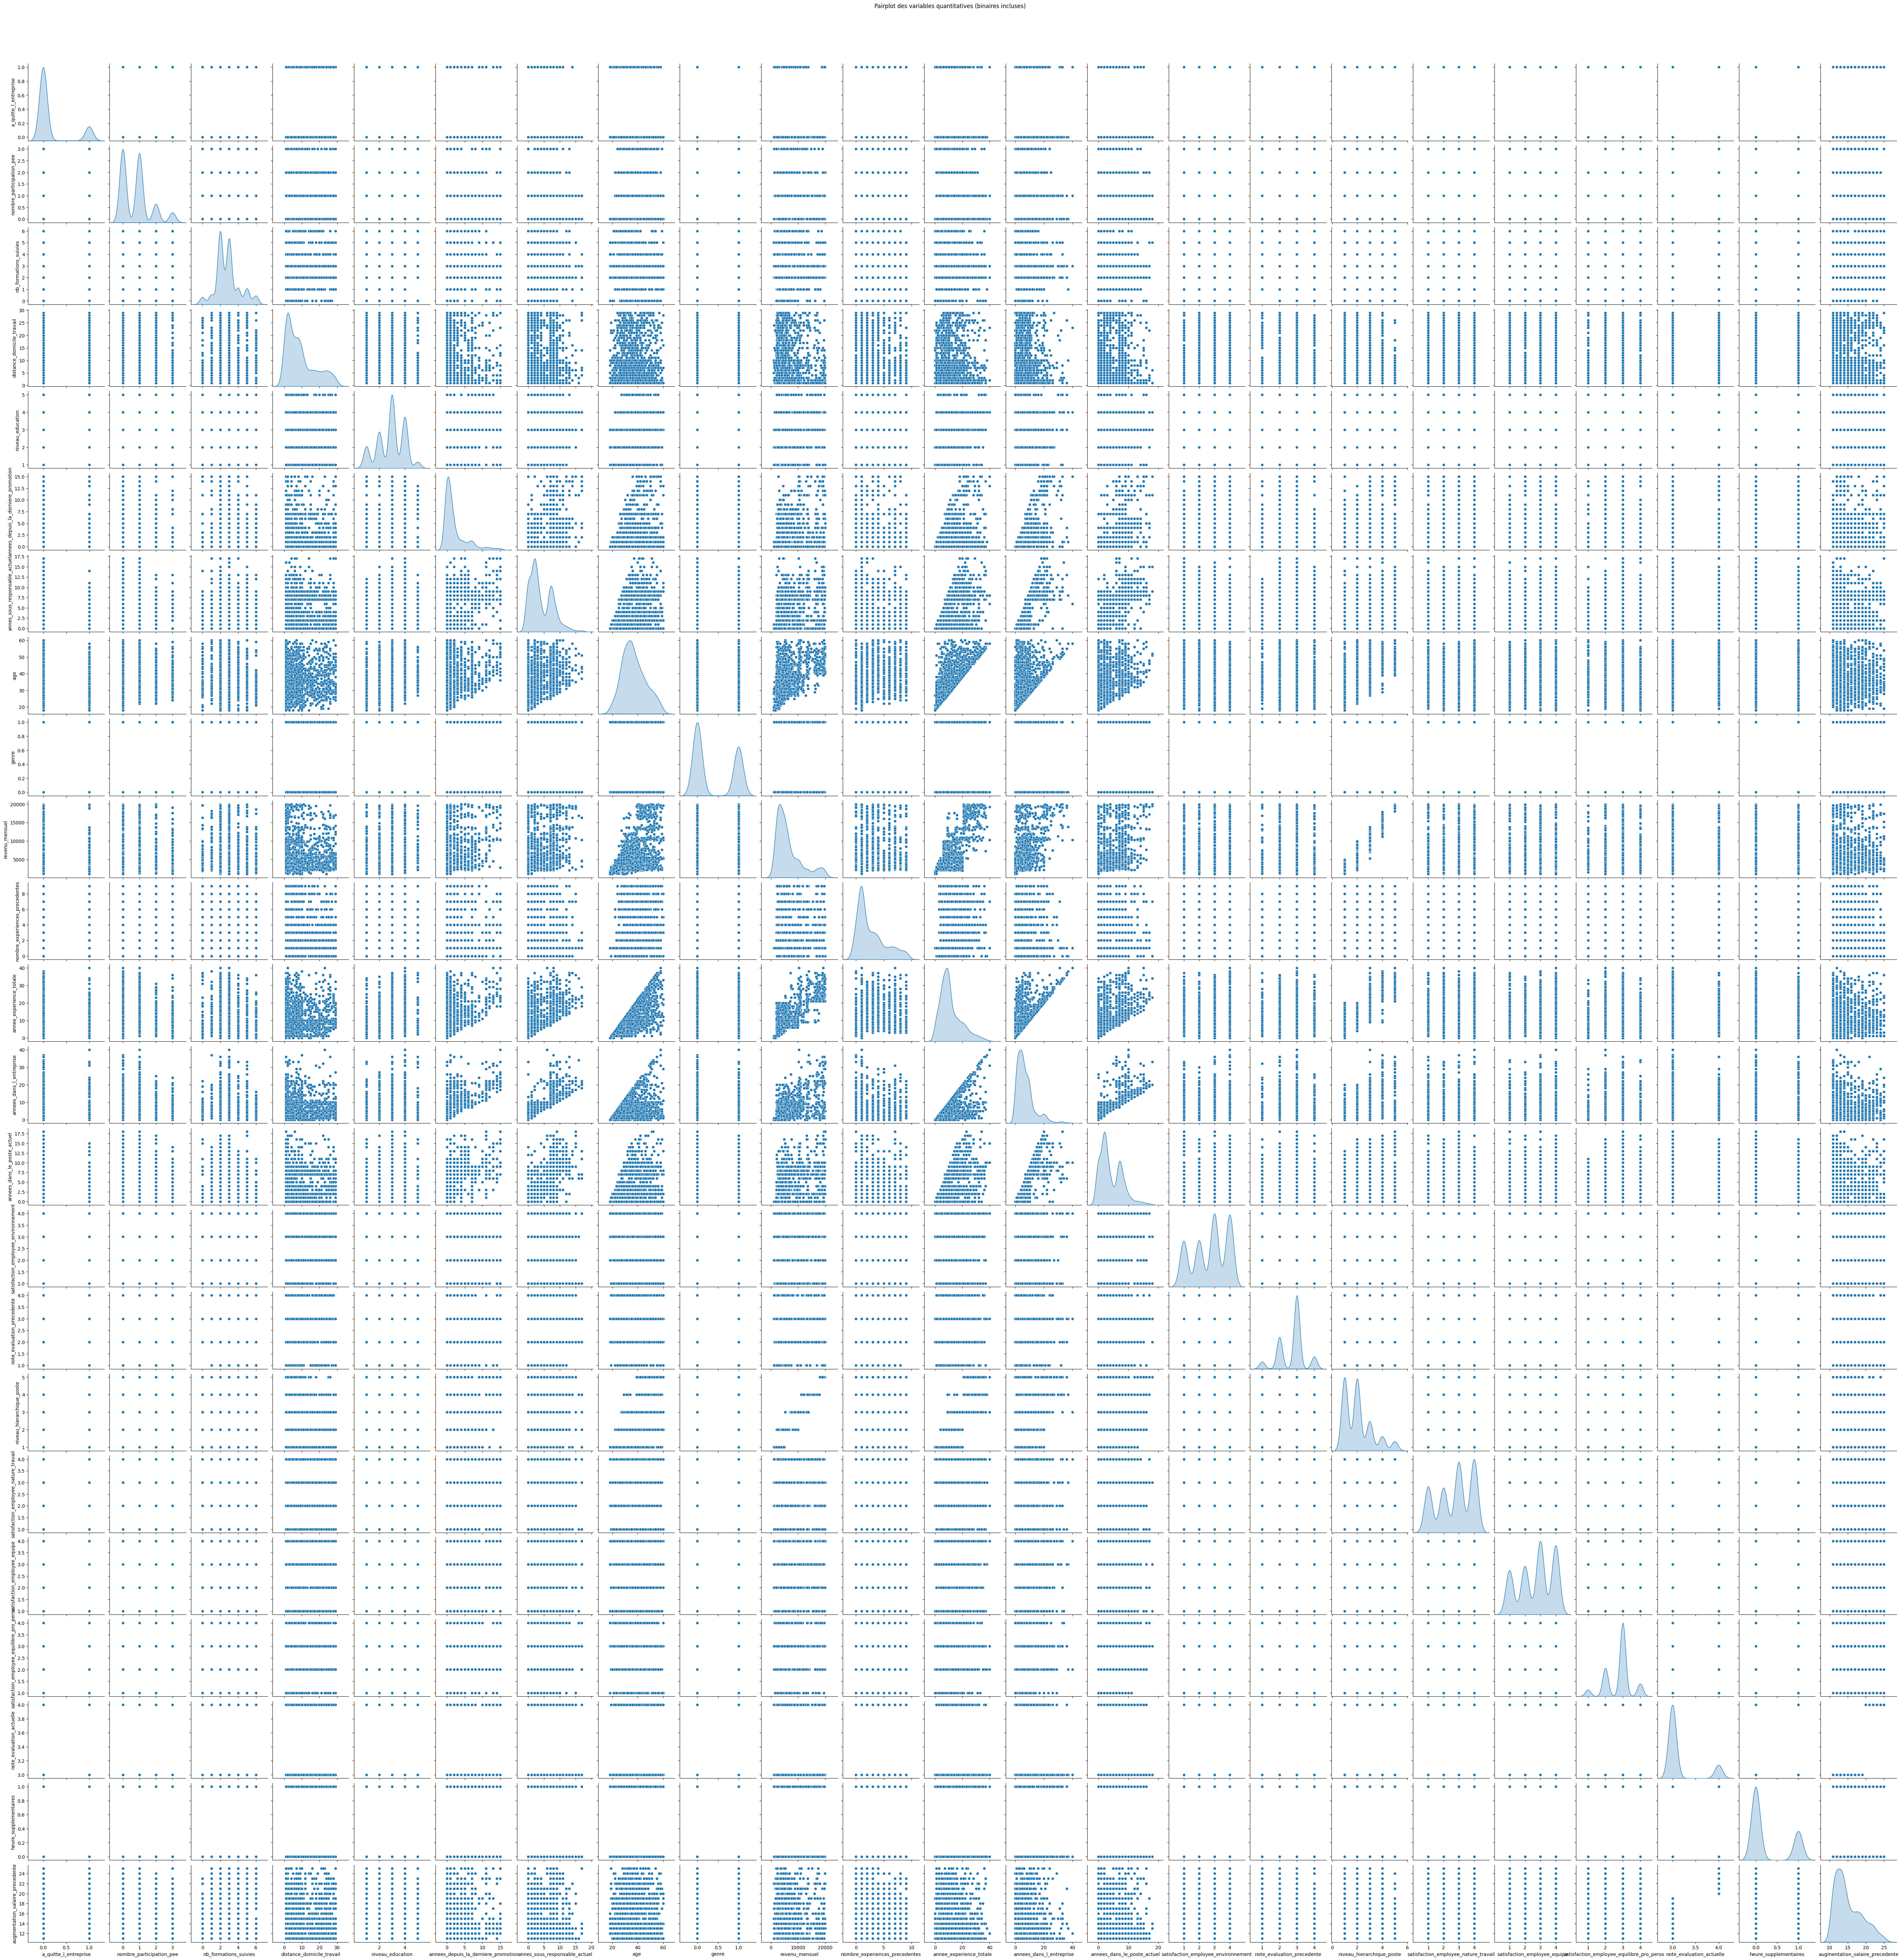

In [ ]:
# Sélection des variables quantitatives (numériques) du DataFrame df1
vars_quanti = df1.select_dtypes(include="number").columns

# Création d’un pairplot pour visualiser les relations entre les variables quantitatives, diag_kind="kde" affiche une estimation de densité sur la diagonale
sns.pairplot(df1[vars_quanti], diag_kind="kde")
# Ajout d’un titre global au graphique
plt.suptitle("Pairplot des variables quantitatives (binaires incluses)", y=1.02)
# Affichage du graphique
plt.show()

Matrice de corrélation de Spearman pour les variables quantitatives

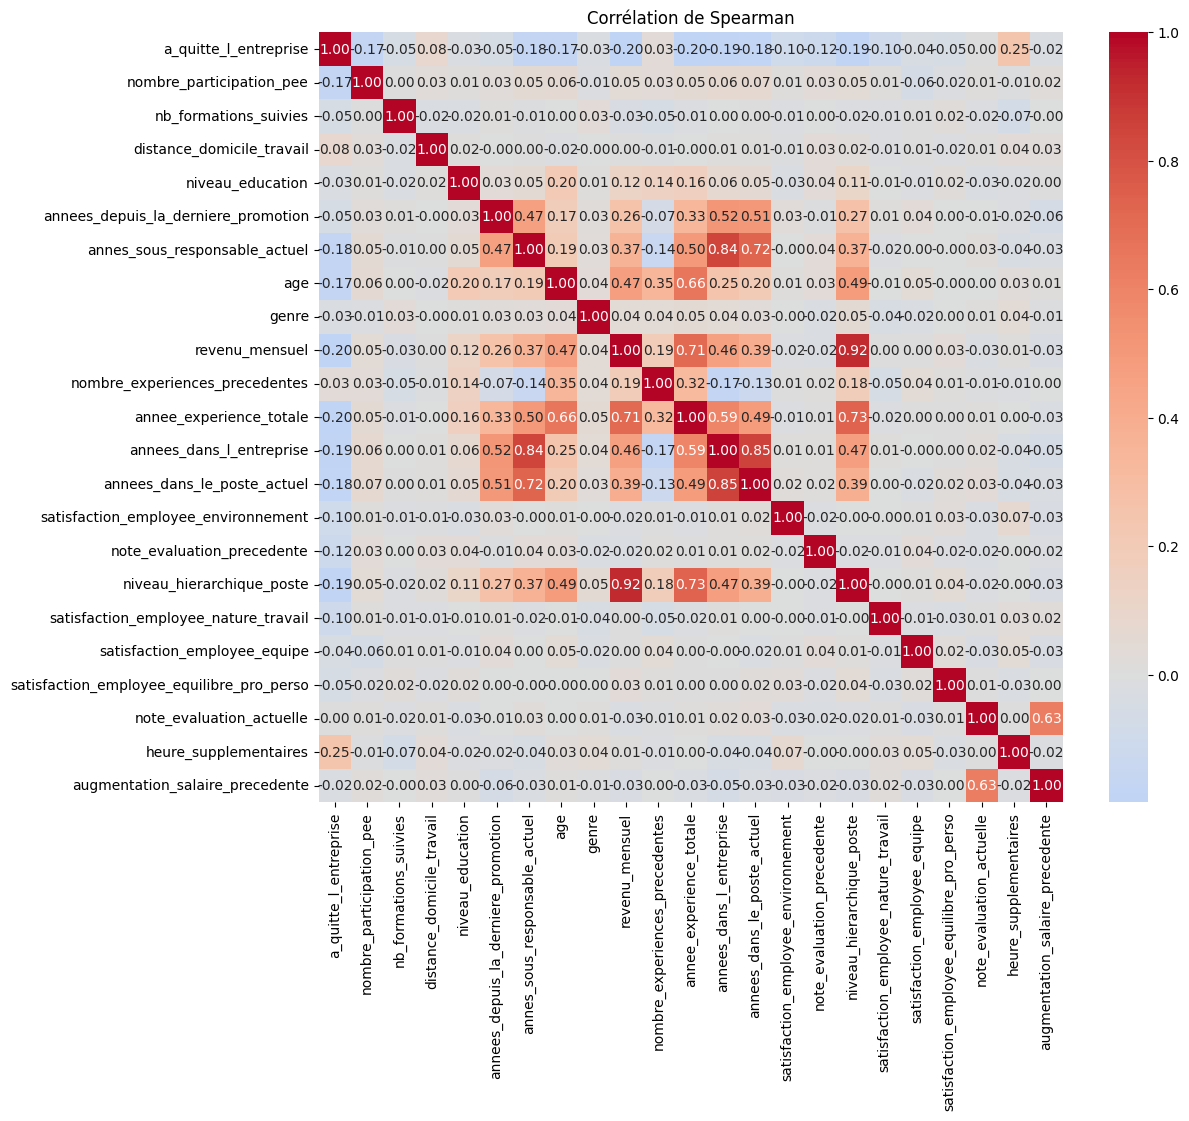

In [ ]:
# Calcul de la matrice de corrélation de Spearman pour les variables quantitatives. La corrélation de Spearman mesure les relations monotones entre variables
corr_spearman = df1[vars_quanti].corr(method="spearman")

# Création de la figure pour la heatmap
plt.figure(figsize=(12, 10))
# Affichage de la heatmap des corrélations
# annot=True affiche les valeurs de corrélation
# fmt=".2f" limite l'affichage à 2 décimales
# cmap="coolwarm" définit la palette de couleurs
# center=0 centre la palette sur la valeur 0
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", center=0)
# Ajout du titre du graphique
plt.title("Corrélation de Spearman")
# Affichage du graphique
plt.show()

### Création de nouvelles features

In [118]:
cols = [
    "satisfaction_employee_environnement",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso"
]

df1["satisfaction_globale"] = df1[cols].mean(axis=1)

In [119]:
cols1 = [
    "note_evaluation_actuelle",
    "note_evaluation_precedente"
]

df1["note_evaluation"] = df1[cols1].mean(axis=1)

Variables à supprimer : 
- satisfaction_employee_environnement (nouvelle features "satisfaction_globale")
- satisfaction_employee_nature_travail (nouvelle features "satisfaction_globale")
- satisfaction_employee_equipe (nouvelle features "satisfaction_globale")
- satisfaction_employee_equilibre_pro_perso (nouvelle features "satisfaction_globale")
- annees_dans_le_poste_actuel (redondance d'information)
- annees_sous_responsable_actuel (redondance d'information)
- annee_experience_totale (redondance d'information)
- note_evaluation_actuelle (nouvelle features "note_evaluation")
- note_evaluation_precedente (nouvelle features "note_evaluation")

In [120]:
df1 = df1.rename(columns={"annes_sous_responsable_actuel": "annees_sous_responsable_actuel"})

In [121]:
# Suppression
df1 = df1.drop(columns=[
    "satisfaction_employee_environnement",
    "satisfaction_employee_nature_travail",
    "satisfaction_employee_equipe",
    "satisfaction_employee_equilibre_pro_perso",
    "annees_dans_le_poste_actuel",
    "annees_sous_responsable_actuel",
    "annee_experience_totale",
    "note_evaluation_actuelle",
    "note_evaluation_precedente",
    ])

Pairplot pour les variables quantitatives

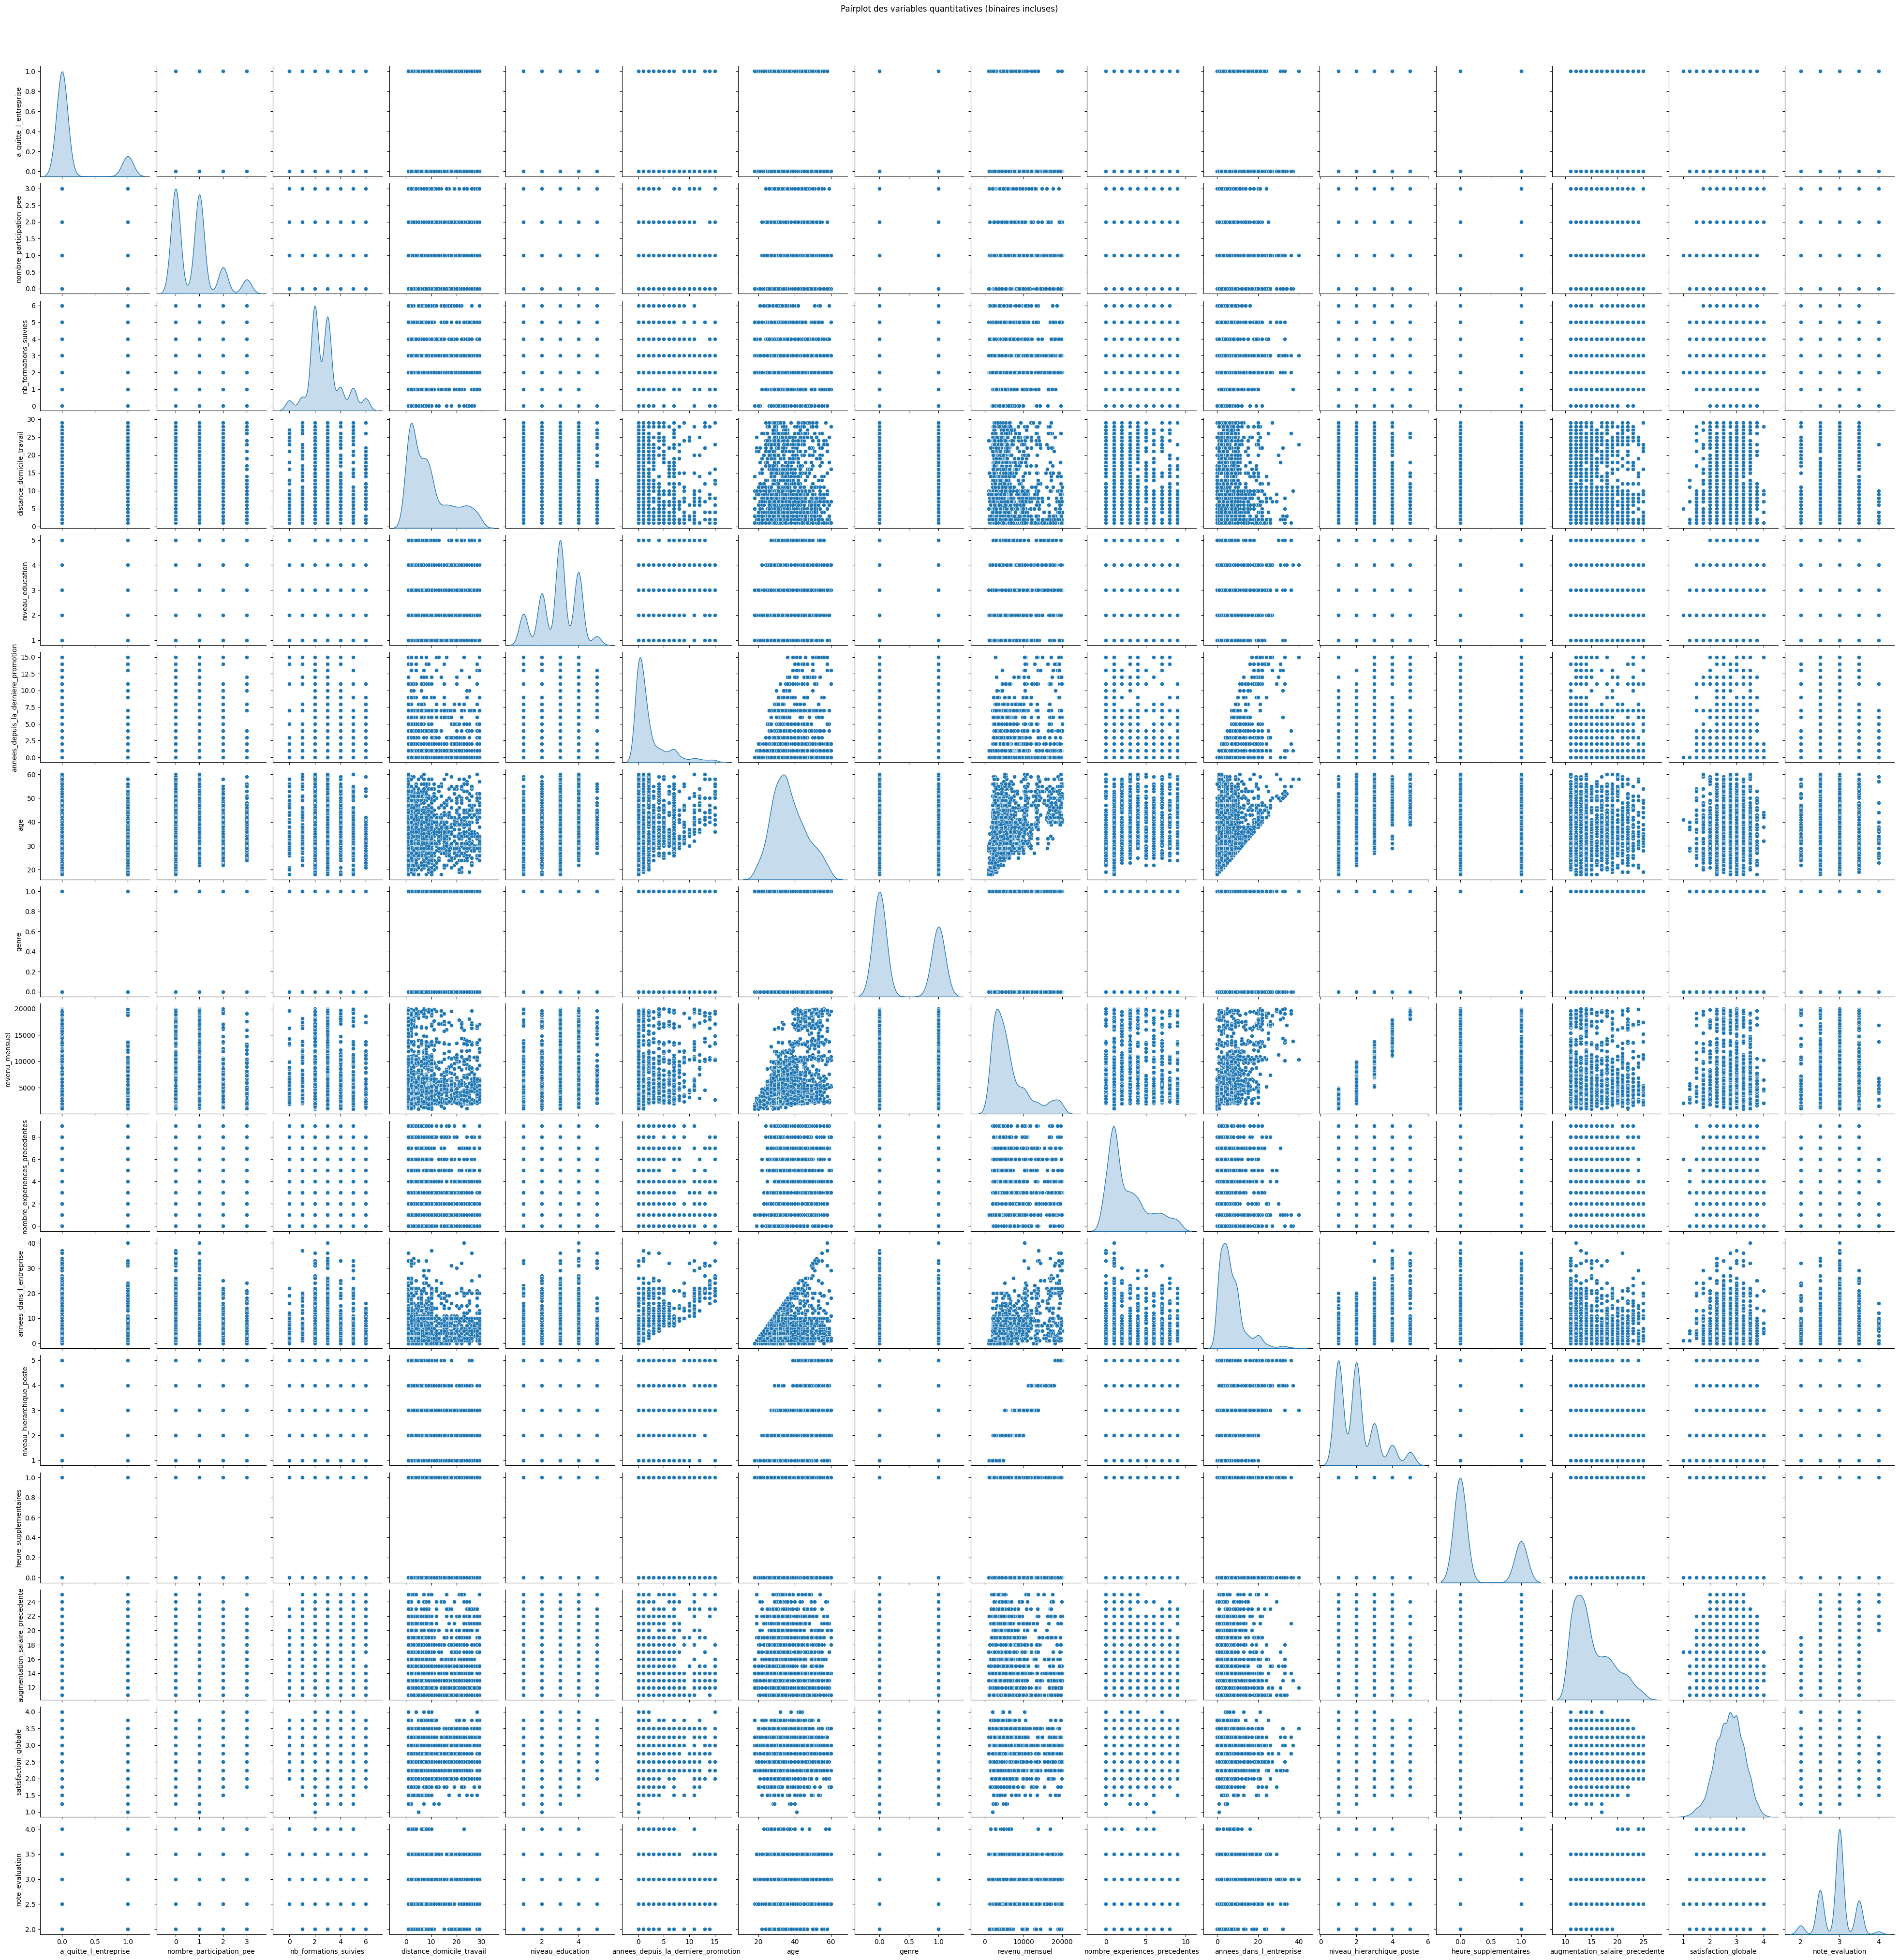

In [122]:
vars_quanti = df1.select_dtypes(include="number").columns

sns.pairplot(df1[vars_quanti], diag_kind="kde")
plt.suptitle("Pairplot des variables quantitatives (binaires incluses)", y=1.02)
plt.show()

Matrice de corrélation de Spearman pour les variables quantitatives

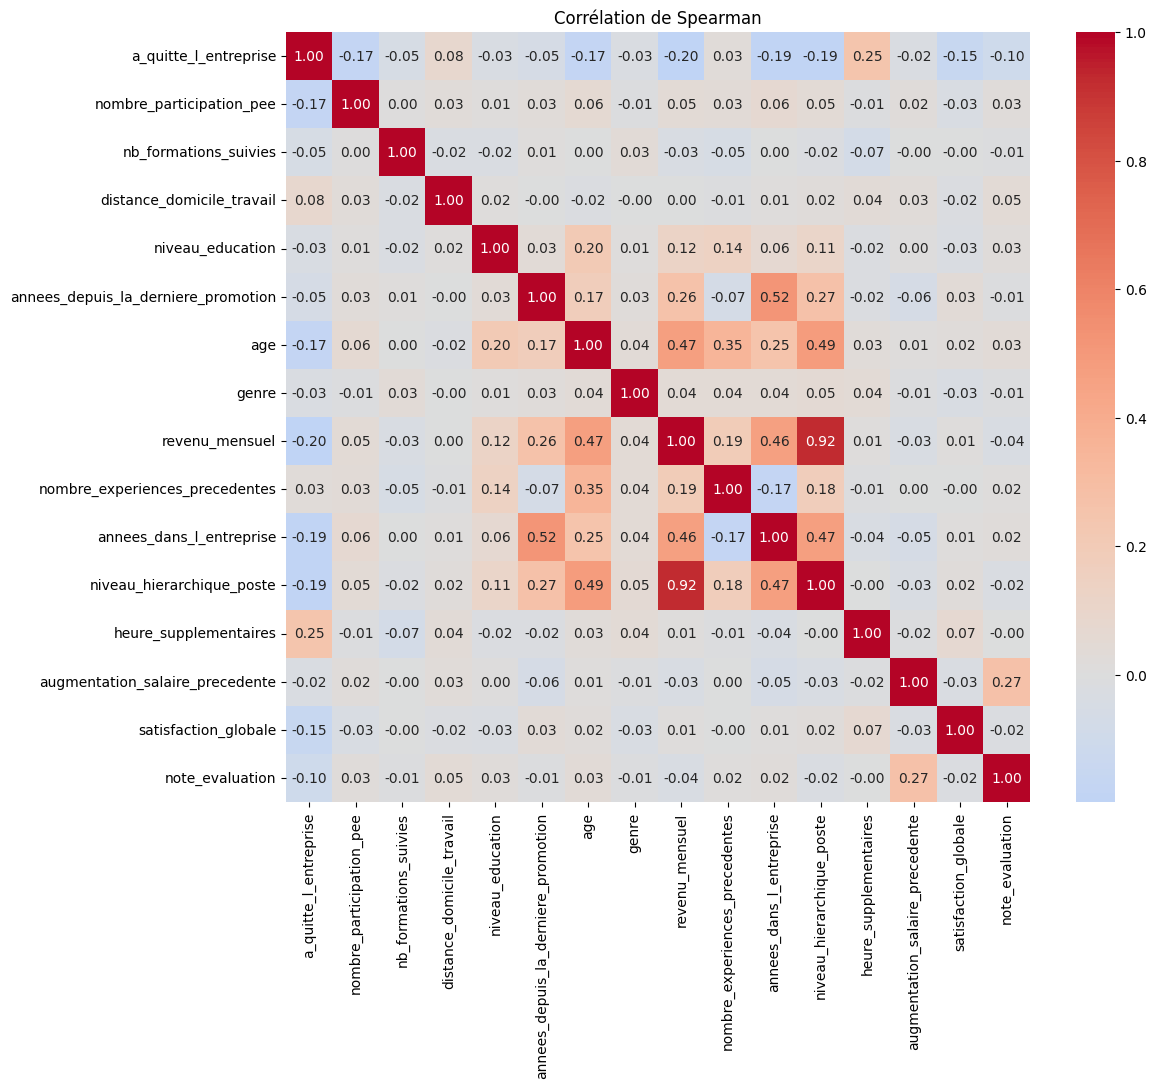

In [123]:
vars_quanti = df1.select_dtypes(include="number").columns

corr_spearman = df1[vars_quanti].corr(method="spearman")

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Corrélation de Spearman")
plt.show()

### Analyse en Composantes Principales (ACP)

Permet de réduire la dimension des données tout en conservant un maximum d'information

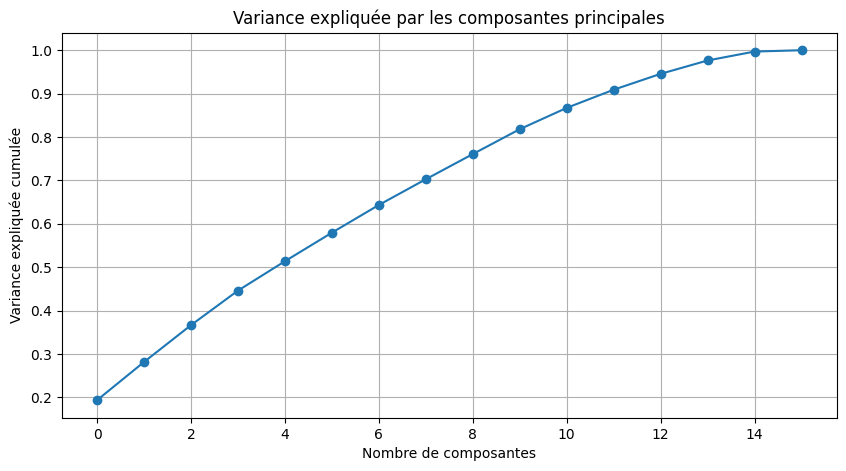

In [ ]:
# Sélection des variables numériques uniquement à partir du DataFrame df1
vars_quanti = df1.select_dtypes(include="number")

# Standardisation des variables. Cette étape met toutes les variables sur la même échelle (moyenne = 0, écart-type = 1)
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(vars_quanti)

# ACP (Analyse en Composantes Principales)

# Création du modèle PCA
pca = PCA()
# Application de l'ACP sur les données standardisées
df1_pca = pca.fit_transform(df1_scaled)

# Analyse de la variance expliquée : permet de savoir combien de composantes sont nécessaires pour bien représenter les données

# Création de la figure
plt.figure(figsize=(10,5))
# Tracé de la variance expliquée cumulée
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
# Ajout des labels des axes
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
# Ajout du titre du graphique
plt.title("Variance expliquée par les composantes principales")
# Ajout de la grille pour faciliter la lecture
plt.grid(True)
# Affichage du graphique
plt.show()

4 composantes principales

In [ ]:
# Création d’un modèle ACP en conservant uniquement 4 composantes principales
pca4 = PCA(n_components=4)
# Application de l’ACP sur les données standardisées. Les données sont projetées sur les 4 composantes principales
X_pca4 = pca4.fit_transform(df1_scaled)

# Création d’un DataFrame à partir des composantes principales obtenues
df_pca4 = pd.DataFrame(
    X_pca4,                                     # Données projetées dans l’espace ACP
    columns=[f"PC{i+1}" for i in range(4)]      # Nommage des composantes : PC1, PC2, PC3, PC4
)

In [ ]:
# Création d’un DataFrame contenant les loadings de l’ACP. Les loadings indiquent la contribution de chaque variable initiale à chacune des composantes principales
loadings = pd.DataFrame(
    pca4.components_.T,                         # Matrice des composantes (transposée pour avoir variables en lignes)
    index=vars_quanti.columns,                  # Noms des variables d'origine
    columns=[f"PC{i+1}" for i in range(4)]      # Noms des composantes principales
)
# Affichage du tableau des loadings
loadings

PC1       PC2       PC3       PC4
a_quitte_l_entreprise               -0.146169 -0.372340  0.347893  0.420003
nombre_participation_pee             0.028095  0.188187 -0.064314 -0.142140
nb_formations_suivies               -0.011699  0.017861 -0.268042 -0.219785
distance_domicile_travail           -0.005407 -0.001489  0.056735  0.297044
niveau_education                     0.116718  0.154734  0.290833 -0.091337
annees_depuis_la_derniere_promotion  0.337214 -0.186872 -0.268823  0.232159
age                                  0.379802  0.159727  0.288540 -0.093546
genre                                0.037977 -0.007539  0.065147 -0.007450
revenu_mensuel                       0.505337 -0.013318  0.068016  0.002399
nombre_experiences_precedentes       0.101310  0.199351  0.594019 -0.221486
annees_dans_l_entreprise             0.419193 -0.163046 -0.298602  0.185787
niveau_hierarchique_poste            0.511347 -0.013769  0.058724  0.002163
heure_supplementaires               -0.014763 -0.230508  0.282529  0.405489
augmentation_salaire_precedente     -0.026594  0.523861 -0.073284  0.434143
satisfaction_globale                 0.029464  0.025018 -0.108968 -0.193949
note_evaluation                     -0.005472  0.588482 -0.090864  0.348864

- ~~a_quitte_l_entreprise~~                     PC4
- ~~nombre_participation_pee~~                  PC2
- ~~nb_formations_suivies~~                     PC3
- ~~distance_domicile_travail~~                 PC4
- ~~niveau_education~~                          PC3
- ~~annees_depuis_la_derniere_promotion~~       PC1
- ~~age~~                                       PC1
- ~~genre~~                                     PC3
- ~~revenu_mensuel~~                            PC1
- ~~nombre_experiences_precedentes~~            PC3
- ~~annees_dans_l_entreprise~~                  PC1
- ~~niveau_hierarchique_poste~~                 PC1
- ~~heure_supplementaires~~                     PC4
- ~~augmentation_salaire_precedente~~           PC2
- ~~satisfaction_globale~~                      PC4
- ~~note_evaluation~~                           PC2

Interprétation des composantes principales :  

**PC1 : ancienneté / position dans l'entreprise**
- annees_dans_l_entreprise
- annees_depuis_la_derniere_promotion
- age
- revenu_mensuel
- niveau_hierarchique_poste

PC1 représente un axe de progression de carrière interne : plus l'individu est âgé, ancien, haut placé et bien rémunéré, plus son score sur PC1 est élevé. Cet axe capte la structure hiérarchique et salariale de l'entreprise.  

**PC2 : reconnaissance / évaluation / avantages**
- note_evaluation
- augmentation_salaire_precedente
- nombre_participation_pee  

PC2 reflète un axe de reconnaissance et de récompense récente : performance évaluée, augmentations salariales et participation aux dispositifs financiers. Il est indépendant de l'ancienneté, ce qui est cohérent avec la matrice de corrélation.  

**PC3 : capital humain / parcours professionnel**  
- niveau_education
- nombre_experiences_precedentes
- nb_formations_suivies
- genre  

PC3 traduit le capital professionnel individuel : formation, expériences passées et niveau académique. Cet axe distingue les profils selon leur bagage professionnel, indépendant du poste actuel.  

**PC4 : condition de travail / désengagement / turnover**  
- a_quitte_l_entreprise
- distance_domicile_travail
- heure_supplementaires
- satisfaction_globale  

PC4 capte un axe de pénibilité et de désengagement : surchage de travail, contraintes personnelles, baisses de satisfaction et lien avec le départ de l'entreprise. C'est l'axe le plus directement lié au turnover.  

Lecture transversale : 
- L’ACP confirme la multicolinéarité observée entre :
    * âge, ancienneté, revenu, niveau hiérarchique → bien captée par PC1
- Les facteurs explicatifs du turnover ne sont pas centraux dans PC1, mais émergent sur PC4
- La satisfaction et les conditions de travail sont orthogonales à la carrière pure

Résultat clé : quitter l’entreprise est davantage lié aux conditions de travail qu’au niveau de carrière.

In [ ]:
# Calcul des coordonnées du cercle de corrélation. Ces coordonnées permettent de représenter les variables sur le plan factoriel de l’ACP

# Création d’une copie des loadings pour stocker les corrélations
correlations = loadings.copy()

# Boucle sur chacune des 4 composantes principales
for i in range(4):
    # Calcul de la corrélation entre chaque variable et la composante i. On multiplie les loadings par la racine carrée de la variance expliquée
    correlations.iloc[:, i] = (
        loadings.iloc[:, i] * np.sqrt(pca4.explained_variance_[i])
    )

In [ ]:
# Fonction permettant de tracer le cercle des corrélations pour deux composantes principales (par défaut PC1 et PC4)
def cercle_correlation_df(corr_df, pc_x=0, pc_y=3):
    # Création de la figure carrée
    plt.figure(figsize=(8, 8))

    # Tracé du cercle unité (rayon = 1), utilisé comme repère
    circle = plt.Circle(
        (0, 0),                         # Centre du cercle                 
        1,                              # Rayon du cercle
        color='gray',                   # Couleur du cercle
        fill=False,                     # Cercle non rempli
        linestyle='--')                 # Style en pointillés
    # Ajout du cercle au graphique
    plt.gca().add_artist(circle)

    # Tracé des flèches représentant les variables
    for var in corr_df.index:
        # Coordonnée de la variable sur l'axe de la composante pc_x
        x = corr_df.iloc[corr_df.index.get_loc(var), pc_x]
        # Coordonnée de la variable sur l'axe de la composante pc_y
        y = corr_df.iloc[corr_df.index.get_loc(var), pc_y]
        # Tracé de la flèche partant de l'origine vers le point (x, y)
        plt.arrow(0, 0, x, y, 
                  alpha=0.8,            # Transparence
                  head_width=0.03,      # Largeur de la pointe de la flèche
                  head_length=0.03)     # Longueur de la pointe de la flèche
        # Ajout du nom de la variable à côté de la flèche
        plt.text(x * 1.08, y * 1.08, var, fontsize=9)

    # Tracé des axes horizontaux et verticaux passant par l'origine
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Noms des axes correspondant aux composantes principales
    plt.xlabel(f'PC{pc_x+1}')
    plt.ylabel(f'PC{pc_y+1}')
    # Titre du graphique
    plt.title('Cercle des corrélations (ACP)')

    # Définition des limites des axes
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    # Ajout d'une grille légère pour faciliter la lecture
    plt.grid(alpha=0.3)
    # Affichage du graphique
    plt.show()

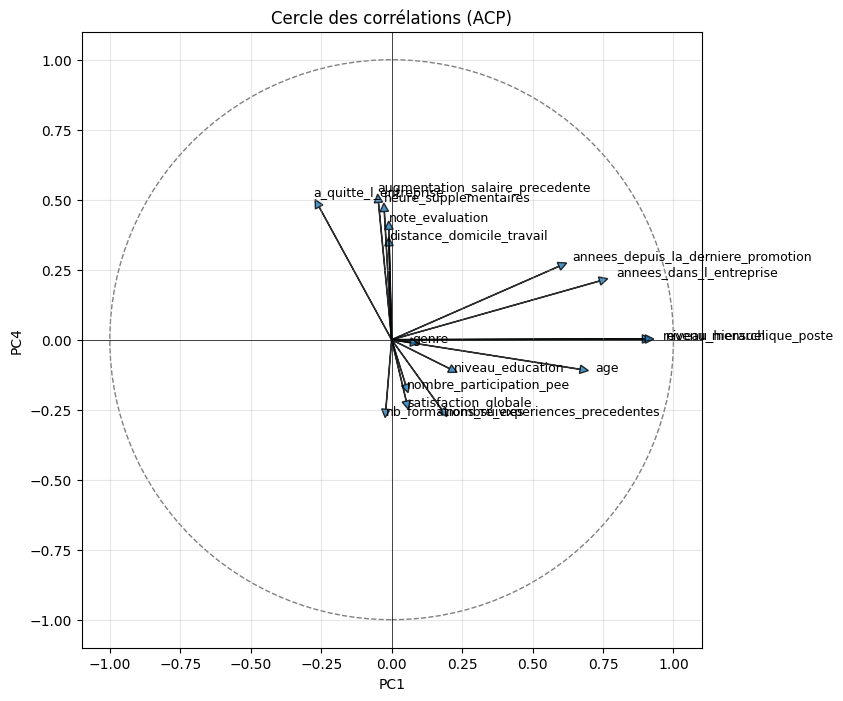

In [ ]:
# Appel de la fonction
cercle_correlation_df(correlations, pc_x=0, pc_y=3)

PC1 : horizontal  
- à droite : carrière établie (ancienneté, hiérarchie, salaire)
- à gauche : profils moins installés  

PC4 : vertical 
- en haut : pénibilité / contraintes / départ
- en bas : satisfaction / engagement  

Conclusion : le fait de quitter l'entreprise n'est pas directement lié au niveau de carrière, on peut être bien payé, ancien, haut placé et quitter l'entreprise, ou jeune, peu ancien et rester. La décision de parti dépend d'autre chose. 

L’ACP a été réalisée sur des variables quantitatives standardisées. Le cercle des corrélations a été construit à partir des corrélations entre les variables initiales et les composantes principales, permettant d’interpréter les axes en termes de carrière, de reconnaissance, de capital humain et de conditions de travail. Bien que les deux premières composantes expliquent une part importante de la variance, le cercle des corrélations a été représenté sur les composantes 1 et 4, car la quatrième composante est celle qui porte l’information la plus directement liée au départ de l’entreprise et aux conditions de travail.

-----------------------------------------------------

# Corrélation (variables qualitatives)

Fonction pour tester la pertinence et la force de lien entre les variables qualitatives et la cible binaires (a_quitte_l_entreprise), elle combine : 
- Chi-deux pour la significativité
- Cramér’s V pour la force de l’association
- Taux d’attrition par modalité pour l'interprétation métier

**Un test du Chi-deux d’indépendance a été réalisé afin d’évaluer l’existence d’une association entre les variables qualitatives et la variable cible. L’hypothèse nulle correspond à une indépendance entre les variables. Au seuil de significativité de 5 %, une p-value inférieure à 0,05 conduit au rejet de l’hypothèse nulle, indiquant l’existence d’un lien statistiquement significatif.**

Chi_deux  

1) Hypothèses du test  
- Hypothèse nulle (H₀) : La variable qualitative et la variable cible sont indépendantes. Autrement dit, la distribution de la variable cible est la même pour toutes les modalités de la variable étudiée.  
- Hypothèse alternative (H₁) : La variable qualitative et la variable cible ne sont pas indépendantes. Il existe une association entre les deux variables.  

2) Statistique de test  

Le test compare : les effectifs observés aux effectifs attendus sous l’hypothèse d’indépendance

Formule du Chi-deux
𝜒2 = ∑(𝑂𝑖𝑗−𝐸𝑖𝑗)2 / 𝐸𝑖𝑗

où : 𝑂𝑖𝑗 = effectif observé et 𝐸𝑖𝑗 = effectif attendu si H₀ est vraie  

3) Condititon d'application  

Le test du χ² est valide si :
- Observations indépendantes
- Variables qualitatives
- Effectifs attendus ≥ 5 dans au moins 80 % des cellules

4) Règle de décision  

Seuil de significativité α = 5% = 0.05

- si p-value <= α alors H₀ est rejetée au seuil de significativité de α = 5%
- si p-value > α alors H₀ est acceptée au seuil de significativité de α = 5%

**La force de l’association entre les variables qualitatives et la variable cible a été mesurée à l’aide du coefficient de Cramér’s V, compris entre 0 et 1. Ce coefficient permet de comparer l’intensité du lien indépendamment de la taille de l’échantillon.**

Cramér's V

1) Définition  

Le Cramér’s V est un coefficient compris entre 0 et 1 : 0 ≤ 𝑉 ≤ 1
- V = 0 → aucune association
- V = 1 → association parfaite

Il est basé sur la statistique du Chi-deux, mais normalisé pour être interprétable.

2) Formule  

V = racine carrée de (χ2 / n×(min(r,k)−1))

où : 𝜒2 = statistique du Chi-deux, 𝑛 = nombre total d’observations, 𝑟 = nombre de lignes (modalités de la variable) et 𝑘 = nombre de colonnes (modalités de la cible)

3) Différence par rapport au Chi-deux  

- Problème du χ² seul
    * dépend fortement de la taille de l’échantillon
    * augmente mécaniquement avec 𝑛
    * non comparable entre variables

- Avantage du Cramér’s V
    * indépendant de la taille de l’échantillon
    * comparable entre variables
    * interprétable comme une "corrélation qualitative"

4) Interprétation  

- Cramér's V < 0.10 : lien nul
- 0.10 < Cramér's V > 0.20 : lien faible
- 0.20 < Cramér's V > 0.40 : lien modéré
- Cramér's V > 0.40 : lien fort

In [ ]:
# Fonction qui analyse le lien entre des variables qualitatives et une variable cible binaire (ex : attrition oui / non)
def analyse_variables_qualitatives(
    df,
    variables_qualitatives,
    cible,
    alpha=0.05,
    min_effectif=30
):
    """
    Analyse la relation entre variables qualitatives et une cible binaire.
    
    Paramètres
    ----------
    df : pandas.DataFrame
        Jeu de données contenant les variables
    variables_qualitatives : list[str]
        Liste des colonnes qualitatives à analyser
    cible : str
        Nom de la variable cible binaire
    alpha : float
        Seuil de significativité pour le test du Chi-2
    min_effectif : int
        Effectif minimum par modalité (sinon warning)
    
    Retour
    ------
    pandas.DataFrame
        Tableau récapitulatif des résultats statistiques
    """
    # Liste qui va stocker les résultats pour chaque variable qualitative
    results = []

    # Boucle sur chaque variable qualitative à analyser
    for var in variables_qualitatives:
        # Création de la table de contingence (variable vs cible)
        contingency = pd.crosstab(df[var], df[cible])

        # On ignore la variable si la cible n'a pas exactement 2 modalités
        if contingency.shape[1] != 2:
            continue

        # Test du Chi-deux pour mesurer l'indépendance entre la variable et la cible
        chi2, p_value, _, _ = chi2_contingency(contingency)

        # Calcul du V de Cramér pour mesurer la force du lien
        n = contingency.sum().sum()     # Effectif total
        r, k = contingency.shape        # Dimensions de la table
        cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))

        # Recherche de l'effectif minimal parmi les modalités
        min_count = contingency.sum(axis=1).min()

        # Calcul du taux de la cible (ex : attrition) par modalité
        attrition_rate = (
            contingency.div(contingency.sum(axis=1), axis=0)    # Calcul des proportions
            .get(1, pd.Series())                                # Récupération de la classe positive
            .to_dict()                                          # Conversion en dictionnaire
        )

        # Ajout des résultats de la variable dans la liste
        results.append({
            "variable": var,                        # Nom de la variable
            "chi2": round(chi2, 3),                 # Statistique du Chi-2
            "p_value": round(p_value, 4),           # p-value du test
            "significatif": p_value < alpha,        # Résultat du test statistique
            "cramers_v": round(cramers_v, 3),       # Force du lien
            "force_lien": (                         # Interprétation de la force du lien
                "fort" if cramers_v >= 0.4 else
                "modéré" if cramers_v >= 0.2 else
                "faible" if cramers_v >= 0.1 else
                "nul"
            ),
            "min_effectif_modalite": int(min_count),    # Taille minimale des modalités
            "modalites_attrition": attrition_rate       # Taux de la cible par modalité
        })

    # Création du DataFrame final et tri par significativité et force du lien
    return pd.DataFrame(results).sort_values(
        by=["significatif", "cramers_v"],
        ascending=False
    )

In [ ]:
# Appel de la fonction
resultats = analyse_variables_qualitatives(
    df1,
    variables_qualitatives,
    cible="a_quitte_l_entreprise"
)

# Affichage du résultat
resultats

variable    chi2  p_value  significatif  cramers_v force_lien  \
4                  poste  86.190   0.0000          True      0.242     modéré   
2         statut_marital  46.164   0.0000          True      0.177     faible   
1  frequence_deplacement  24.182   0.0000          True      0.128     faible   
0          domaine_etude  16.025   0.0068          True      0.104     faible   
3            departement  10.796   0.0045          True      0.086        nul   

   min_effectif_modalite                                modalites_attrition  
4                     52  {'Assistant de Direction': 0.16095890410958905...  
2                    327  {'Célibataire': 0.2553191489361702, 'Divorcé(e...  
1                    150  {'Aucun': 0.08, 'Frequent': 0.2490974729241877...  
0                     27  {'Autre': 0.13414634146341464, 'Entrepreunaria...  
3                     63  {'Commercial': 0.2062780269058296, 'Consulting...

Bien que les tests du chi-deux et les coefficients de V de Cramér indiquent des niveaux de dépendance globalement faibles à modérés entre certaines variables qualitatives et la variable de départ de l’entreprise, il a été choisi de conserver l’ensemble des variables qualitatives pour la phase de modélisation.

Ce choix s’appuie sur les résultats de l’analyse exploratoire des données, notamment les visualisations, qui mettent en évidence des différences notables de taux de démission selon certaines modalités (poste occupé, département, domaine d’étude, etc.). Ces éléments suggèrent que ces variables peuvent contenir une information explicative pertinente, potentiellement exploitable dans un cadre multivarié, même si leur lien pris isolément apparaît limité.

Afin d’éviter le risque d’exclure prématurément des variables porteuses d’information, il a été privilégié une approche conservatrice. La pertinence réelle de ces variables sera ensuite évaluée à l’aide des performances et des résultats des modèles entraînés, et des ajustements pourront être effectués a posteriori si certaines variables s’avèrent peu contributives.

-----------------------------------------

# Statistiques descriptives sur fichier final

In [132]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   a_quitte_l_entreprise                      1470 non-null   object
 1   nombre_participation_pee                   1470 non-null   int64 
 2   nb_formations_suivies                      1470 non-null   int64 
 3   nombre_employee_sous_responsabilite        1470 non-null   int64 
 4   code_sondage                               1470 non-null   int64 
 5   distance_domicile_travail                  1470 non-null   int64 
 6   niveau_education                           1470 non-null   int64 
 7   domaine_etude                              1470 non-null   object
 8   ayant_enfants                              1470 non-null   object
 9   frequence_deplacement                      1470 non-null   object
 10  annees_depuis_la_derniere_promotion 

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   a_quitte_l_entreprise                1470 non-null   int64  
 1   nombre_participation_pee             1470 non-null   int64  
 2   nb_formations_suivies                1470 non-null   int64  
 3   distance_domicile_travail            1470 non-null   int64  
 4   niveau_education                     1470 non-null   int64  
 5   domaine_etude                        1470 non-null   object 
 6   frequence_deplacement                1470 non-null   object 
 7   annees_depuis_la_derniere_promotion  1470 non-null   int64  
 8   age                                  1470 non-null   int64  
 9   genre                                1470 non-null   int64  
 10  revenu_mensuel                       1470 non-null   int64  
 11  statut_marital                

In [134]:
df_merged.describe().T

count         mean          std  \
nombre_participation_pee                   1470.0     0.793878     0.852077   
nb_formations_suivies                      1470.0     2.799320     1.289271   
nombre_employee_sous_responsabilite        1470.0     1.000000     0.000000   
code_sondage                               1470.0  1024.865306   602.024335   
distance_domicile_travail                  1470.0     9.192517     8.106864   
niveau_education                           1470.0     2.912925     1.024165   
annees_depuis_la_derniere_promotion        1470.0     2.187755     3.222430   
annes_sous_responsable_actuel              1470.0     4.123129     3.568136   
id_employee                                1470.0  1024.865306   602.024335   
age                                        1470.0    36.923810     9.135373   
revenu_mensuel                             1470.0  6502.931293  4707.956783   
nombre_experiences_precedentes             1470.0     2.693197     2.498009   
nombre_heures_travailless                  1470.0    80.000000     0.000000   
annee_experience_totale                    1470.0    11.279592     7.780782   
annees_dans_l_entreprise                   1470.0     7.008163     6.126525   
annees_dans_le_poste_actuel                1470.0     4.229252     3.623137   
satisfaction_employee_environnement        1470.0     2.721769     1.093082   
note_evaluation_precedente                 1470.0     2.729932     0.711561   
niveau_hierarchique_poste                  1470.0     2.063946     1.106940   
satisfaction_employee_nature_travail       1470.0     2.728571     1.102846   
satisfaction_employee_equipe               1470.0     2.712245     1.081209   
satisfaction_employee_equilibre_pro_perso  1470.0     2.761224     0.706476   
eval_number                                1470.0  1024.865306   602.024335   
note_evaluation_actuelle                   1470.0     3.153741     0.360824   

                                              min      25%     50%      75%  \
nombre_participation_pee                      0.0     0.00     1.0     1.00   
nb_formations_suivies                         0.0     2.00     3.0     3.00   
nombre_employee_sous_responsabilite           1.0     1.00     1.0     1.00   
code_sondage                                  1.0   491.25  1020.5  1555.75   
distance_domicile_travail                     1.0     2.00     7.0    14.00   
niveau_education                              1.0     2.00     3.0     4.00   
annees_depuis_la_derniere_promotion           0.0     0.00     1.0     3.00   
annes_sous_responsable_actuel                 0.0     2.00     3.0     7.00   
id_employee                                   1.0   491.25  1020.5  1555.75   
age                                          18.0    30.00    36.0    43.00   
revenu_mensuel                             1009.0  2911.00  4919.0  8379.00   
nombre_experiences_precedentes                0.0     1.00     2.0     4.00   
nombre_heures_travailless                    80.0    80.00    80.0    80.00   
annee_experience_totale                       0.0     6.00    10.0    15.00   
annees_dans_l_entreprise                      0.0     3.00     5.0     9.00   
annees_dans_le_poste_actuel                   0.0     2.00     3.0     7.00   
satisfaction_employee_environnement           1.0     2.00     3.0     4.00   
note_evaluation_precedente                    1.0     2.00     3.0     3.00   
niveau_hierarchique_poste                     1.0     1.00     2.0     3.00   
satisfaction_employee_nature_travail          1.0     2.00     3.0     4.00   
satisfaction_employee_equipe                  1.0     2.00     3.0     4.00   
satisfaction_employee_equilibre_pro_perso     1.0     2.00     3.0     3.00   
eval_number                                   1.0   491.25  1020.5  1555.75   
note_evaluation_actuelle                      3.0     3.00     3.0     3.00   

                                               max  
nombre_participation_pee               

In [135]:
df1.describe().T

count         mean          std     min  \
a_quitte_l_entreprise                1470.0     0.161224     0.367863     0.0   
nombre_participation_pee             1470.0     0.793878     0.852077     0.0   
nb_formations_suivies                1470.0     2.799320     1.289271     0.0   
distance_domicile_travail            1470.0     9.192517     8.106864     1.0   
niveau_education                     1470.0     2.912925     1.024165     1.0   
annees_depuis_la_derniere_promotion  1470.0     2.187755     3.222430     0.0   
age                                  1470.0    36.923810     9.135373    18.0   
genre                                1470.0     0.400000     0.490065     0.0   
revenu_mensuel                       1470.0  6502.931293  4707.956783  1009.0   
nombre_experiences_precedentes       1470.0     2.693197     2.498009     0.0   
annees_dans_l_entreprise             1470.0     7.008163     6.126525     0.0   
niveau_hierarchique_poste            1470.0     2.063946     1.106940     1.0   
heure_supplementaires                1470.0     0.282993     0.450606     0.0   
augmentation_salaire_precedente      1470.0    15.209524     3.659938    11.0   
satisfaction_globale                 1470.0     2.730952     0.505815     1.0   
note_evaluation                      1470.0     2.941837     0.394203     2.0   

                                        25%      50%     75%      max  
a_quitte_l_entreprise                   0.0     0.00     0.0      1.0  
nombre_participation_pee                0.0     1.00     1.0      3.0  
nb_formations_suivies                   2.0     3.00     3.0      6.0  
distance_domicile_travail               2.0     7.00    14.0     29.0  
niveau_education                        2.0     3.00     4.0      5.0  
annees_depuis_la_derniere_promotion     0.0     1.00     3.0     15.0  
age                                    30.0    36.00    43.0     60.0  
genre                                   0.0     0.00     1.0      1.0  
revenu_mensuel                       2911.0  4919.00  8379.0  19999.0  
nombre_experiences_precedentes          1.0     2.00     4.0      9.0  
annees_dans_l_entreprise                3.0     5.00     9.0     40.0  
niveau_hierarchique_poste               1.0     2.00     3.0      5.0  
heure_supplementaires                   0.0     0.00     1.0      1.0  
augmentation_salaire_precedente        12.0    14.00    18.0     25.0  
satisfaction_globale                    2.5     2.75     3.0      4.0  
note_evaluation                         2.5     3.00     3.0      4.0

In [ ]:
# Enregistrement du dataframe final en csv
df1.to_csv("data/df1.csv", index=False)

---------------------------------------------